### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# We'll also use `tabulate` library, make sure it's present:
%pip install tabulate
from tabulate import tabulate

Note: you may need to restart the kernel to use updated packages.


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

# Make sure we can see all columns for comprehensive review
pd.options.display.max_columns = 40

# Set Seaborn theme
sns.set_theme(style="darkgrid")

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
# make a copy of the original data set for future comparison purposes,
# keeping `data` as the cleansed/transformed set
data_original = data.copy()

# Understand the size of the dataset
shape_original = data_original.shape
shape_original

(12684, 26)

---
> ##### 2.1. Evaluate the dataset for duplicates
---

In [5]:
# What percentage of the dataset has duplicate data, if any?
# If insignificant, may consider dropping them.
duplicated = data.duplicated().mean() * 100
print("Percentage of duplicated observations is: " + str(round(duplicated, 3)) + "%")

Percentage of duplicated observations is: 0.583%


In [6]:
# From above duplicates review, less than 1% of the rows are duplicates, drop duplicates
data = data.drop_duplicates()
shape_cleaned = data.shape

print("Dropped " + str(shape_original[0] - shape_cleaned[0]) + " duplicated observations.") 

Dropped 74 duplicated observations.


---
> ##### 2.2. Evaluate structural composition of dataset for errors/corrections
---

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12610 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12503 non-null

In [8]:
# Pet Peeve: Correct a mispelling `passenger`
data = data.rename(columns={'passanger':'passenger'})

In [9]:
# Review if `time` should be re-casted to integers
data["time"].value_counts()

# It may be interesting to translate into a 24-hour integer representation for numerical review, 
# though likely best to keep it as categorical


6PM     3220
7AM     3114
10AM    2271
2PM     2006
10PM    1999
Name: time, dtype: int64

In [10]:
# Review if `expiration` should be re-casted to integers
data["expiration"].value_counts()

# Decision: Leave it as categorical

1d    7031
2h    5579
Name: expiration, dtype: int64

---
> ###### We'll need to transform some data features into cohorts or more plottable summaries, let's do that now
---

In [11]:
### Corhorting Preferences: group values into two cohorts to use in a later question:
    # cohort 1: 3 or fewer (includes: ["never", "less1", "1~3"])
    # cohort 2: greater than 3 (includes: ["4~8", "gt8"])



# Apply a lambda function to assign cohort values ["> 3" or "<= 3"] based on list matches for the following
# "preference" features:
#   * Bar
#   * CoffeeHouse
#   * CarryAway
#   * RestaurantLessThan20
#   * Restaurant20To50

def evaluateCohorts (pref):
    '''
    Return the cohort/grouping value based on the value passed in
    If value is NaN, return NaN
    '''
    if pref is np.nan:
        # If no value is passed in, return None
        return np.nan
    else:
        # We'll create a list of one cohort set, and imply the other
        cohort_frequently = ["4~8", "gt8"]

        return "> 3" if pref in cohort_frequently else "<= 3"

    
data.insert(20, "Restaurant20To50_Cohort", data["Restaurant20To50"].apply(evaluateCohorts))
data.insert(19, "RestaurantLessThan20_Cohort", data["RestaurantLessThan20"].apply(evaluateCohorts))
data.insert(18, "CarryAway_Cohort", data["CarryAway"].apply(evaluateCohorts))
data.insert(17, "CoffeeHouse_Cohort", data["CoffeeHouse"].apply(evaluateCohorts))
data.insert(16, "Bar_Cohort", data["Bar"].apply(evaluateCohorts))
    
data.sample(20)

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,Bar_Cohort,CoffeeHouse,CoffeeHouse_Cohort,CarryAway,CarryAway_Cohort,RestaurantLessThan20,RestaurantLessThan20_Cohort,Restaurant20To50,Restaurant20To50_Cohort,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9588,Home,Alone,Sunny,80,6PM,Carry out & Take away,1d,Female,31,Unmarried partner,1,Bachelors degree,Computer & Mathematical,$62500 - $74999,NaN,never,<= 3,1~3,<= 3,4~8,> 3,1~3,<= 3,1~3,<= 3,1,0,0,0,1,0
12065,No Urgent Place,Kid(s),Snowy,30,6PM,Bar,1d,Female,46,Married partner,1,Bachelors degree,Business & Financial,$100000 or More,NaN,never,<= 3,4~8,> 3,4~8,> 3,1~3,<= 3,NaN,NaN,1,0,0,0,1,0
3072,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,0,High School Graduate,Unemployed,$37500 - $49999,NaN,gt8,> 3,gt8,> 3,gt8,> 3,gt8,> 3,gt8,> 3,1,0,0,0,1,1
4908,Home,Alone,Sunny,80,6PM,Coffee House,1d,Female,31,Married partner,1,Some college - no degree,Arts Design Entertainment Sports & Media,$12500 - $24999,NaN,never,<= 3,1~3,<= 3,4~8,> 3,4~8,> 3,never,<= 3,1,0,0,0,1,1
4185,Home,Alone,Sunny,80,10PM,Restaurant(<20),2h,Male,26,Single,0,Associates degree,Unemployed,Less than $12500,NaN,less1,<= 3,never,<= 3,1~3,<= 3,less1,<= 3,less1,<= 3,1,0,0,1,0,0
7583,No Urgent Place,Alone,Sunny,55,6PM,Coffee House,2h,Male,26,Married partner,0,Bachelors degree,Computer & Mathematical,$50000 - $62499,NaN,less1,<= 3,less1,<= 3,1~3,<= 3,less1,<= 3,less1,<= 3,1,0,0,0,1,1
5543,Work,Alone,Sunny,55,7AM,Coffee House,1d,Female,50plus,Single,0,High School Graduate,Management,$37500 - $49999,NaN,less1,<= 3,less1,<= 3,less1,<= 3,less1,<= 3,1~3,<= 3,1,1,0,0,1,0
6077,Home,Alone,Sunny,80,6PM,Coffee House,1d,Female,50plus,Single,0,Graduate degree (Masters or Doctorate),Unemployed,Less than $12500,NaN,never,<= 3,gt8,> 3,1~3,<= 3,less1,<= 3,less1,<= 3,1,0,0,1,0,1
3031,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,0,Some college - no degree,Student,$12500 - $24999,NaN,less1,<= 3,never,<= 3,less1,<= 3,less1,<= 3,less1,<= 3,1,1,0,0,1,0
11162,Home,Alone,Snowy,30,10PM,Coffee House,2h,Female,41,Married partner,1,Graduate degree (Masters or Doctorate),Computer & Mathematical,$75000 - $87499,NaN,less1,<= 3,4~8,> 3,gt8,> 3,1~3,<= 3,less1,<= 3,1,1,0,0,1,0


In [12]:
data[data["Bar"].isna()]

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,Bar_Cohort,CoffeeHouse,CoffeeHouse_Cohort,CarryAway,CarryAway_Cohort,RestaurantLessThan20,RestaurantLessThan20_Cohort,Restaurant20To50,Restaurant20To50_Cohort,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
517,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,50plus,Divorced,1,Some college - no degree,Management,$62500 - $74999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,0
518,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,50plus,Divorced,1,Some college - no degree,Management,$62500 - $74999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,0
519,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,50plus,Divorced,1,Some college - no degree,Management,$62500 - $74999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,1,1
520,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,50plus,Divorced,1,Some college - no degree,Management,$62500 - $74999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,0
521,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,50plus,Divorced,1,Some college - no degree,Management,$62500 - $74999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12168,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Female,31,Single,0,Associates degree,Arts Design Entertainment Sports & Media,$75000 - $87499,NaN,NaN,NaN,less1,<= 3,gt8,> 3,1~3,<= 3,less1,<= 3,1,0,0,1,0,0
12169,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Female,31,Single,0,Associates degree,Arts Design Entertainment Sports & Media,$75000 - $87499,NaN,NaN,NaN,less1,<= 3,gt8,> 3,1~3,<= 3,less1,<= 3,1,0,0,0,1,0
12170,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,31,Single,0,Associates degree,Arts Design Entertainment Sports & Media,$75000 - $87499,NaN,NaN,NaN,less1,<= 3,gt8,> 3,1~3,<= 3,less1,<= 3,1,0,0,1,0,1
12171,Work,Alone,Snowy,30,7AM,Bar,1d,Female,31,Single,0,Associates degree,Arts Design Entertainment Sports & Media,$75000 - $87499,NaN,NaN,NaN,less1,<= 3,gt8,> 3,1~3,<= 3,less1,<= 3,1,1,1,0,1,0


---
> ##### 2.3. Evaluate dataset for missing data
---

In [13]:
# Review data features missing data for modeling impact
# Values are in percentages (%)
missing_data = (data.isna().mean()*100).sort_values(ascending=False)
missing_data


car                            99.143537
CoffeeHouse_Cohort              1.720856
CoffeeHouse                     1.720856
Restaurant20To50_Cohort         1.498810
Restaurant20To50                1.498810
CarryAway_Cohort                1.189532
CarryAway                       1.189532
RestaurantLessThan20_Cohort     1.022998
RestaurantLessThan20            1.022998
Bar                             0.848533
Bar_Cohort                      0.848533
direction_opp                   0.000000
direction_same                  0.000000
toCoupon_GEQ25min               0.000000
toCoupon_GEQ15min               0.000000
toCoupon_GEQ5min                0.000000
destination                     0.000000
passenger                       0.000000
income                          0.000000
occupation                      0.000000
education                       0.000000
has_children                    0.000000
maritalStatus                   0.000000
age                             0.000000
gender          

Text(0.5, 0, 'Data Features Within Dataset')

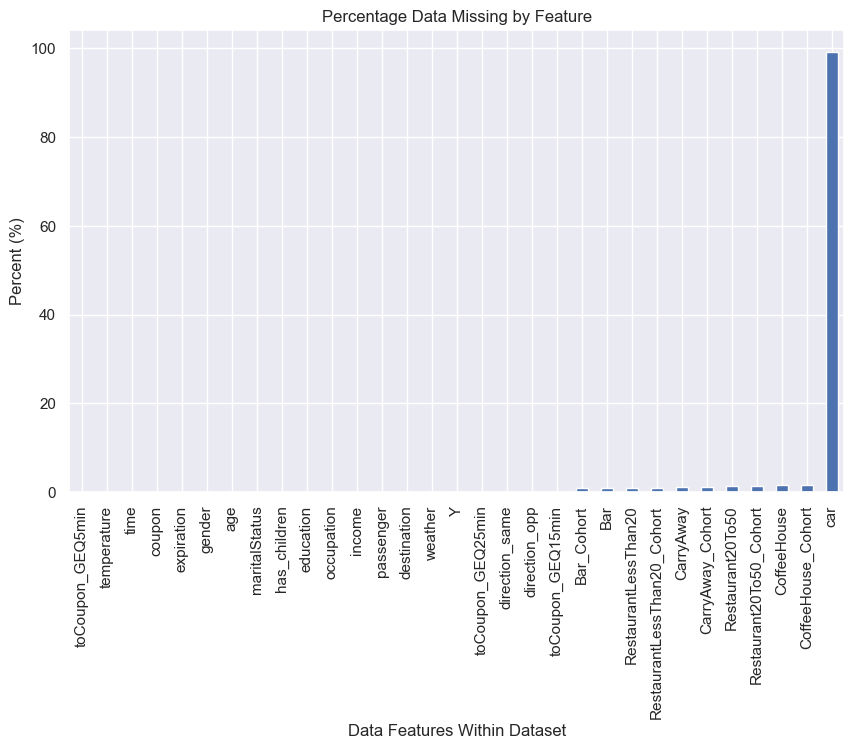

In [14]:
# Let's visualize missing data across any data feature to understand quantitatively which may require additional review
plt.figure(figsize=(10,6))
missing_data.sort_values().plot(kind="bar", title="Percentage Data Missing by Feature")
plt.ylabel("Percent (%)")
plt.xlabel("Data Features Within Dataset")


<AxesSubplot: >

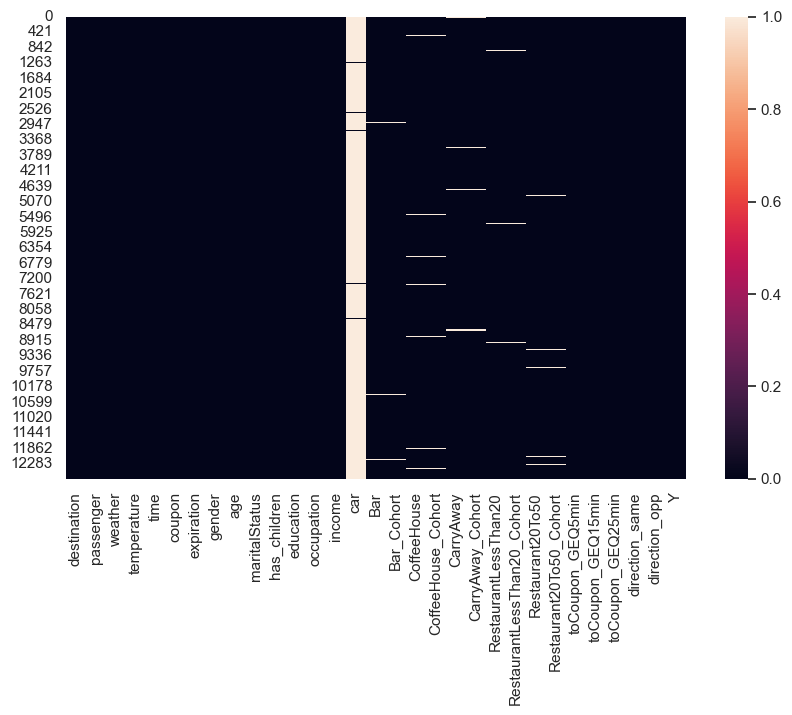

In [15]:
# Let's visually evaluate the missing data across any data feature to understand distribution, 
# for any additional insights
plt.figure(figsize=(10,6))
sns.heatmap(data.isna())


---
> ##### Insights/Observations: Missing Data 
From the above review of **_percentage data missing by feature_** (above), the following is observed:
> * `car` feature is largely missing (> 99%), and will either need to be imputed or removed from consideration. It may be valuable to drop the column or exclude it if determined to drop NaNs from other features missing data, otherwise we'd drop over 99% of our dataset as a result.
> * `CoffeeHouse`, `Restaurant20to50`, `CarryAway`, `RestaurantLessThan20`, and `Bar` quantitatively have less than 2% missing data and a seemingly uninteresting distribution; therefore we can either keep but ignore the missing data, or drop incomplete records.
---

---
> ##### 2.4. Evaluate and plot each data feature individually (Univariate analysis)
---

In [16]:
# Add some runtime configurations (RC) to suppress accepted warnings
plt.rcParams['figure.max_open_warning'] = 50


/────────────────────────────────────────  Feature: DESTINATION  ────────────────────────────────────────/

| Unique values for "destination"   |   Occurrences |
|-----------------------------------+---------------|
| Work                              |          2976 |
| Home                              |          3078 |
| No Urgent Place                   |          5953 |


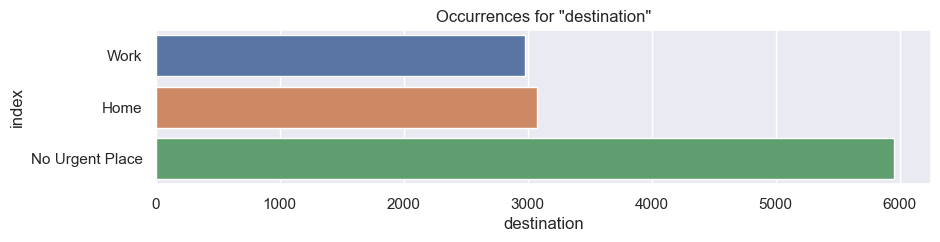


/────────────────────────────────────────  Feature: PASSENGER  ────────────────────────────────────────/

| Unique values for "passenger"   |   Occurrences |
|---------------------------------+---------------|
| Kid(s)                          |           933 |
| Partner                         |          1018 |
| Friend(s)                       |          3142 |
| Alone                           |          6914 |


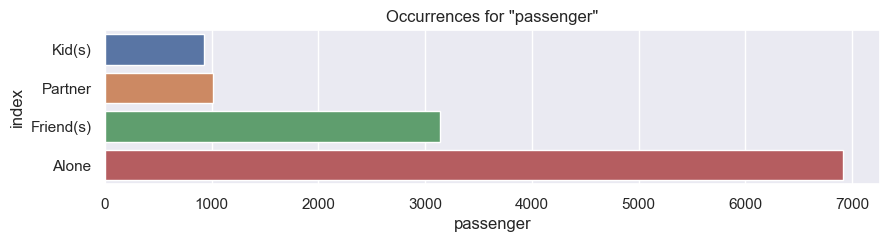


/────────────────────────────────────────  Feature: WEATHER  ────────────────────────────────────────/

| Unique values for "weather"   |   Occurrences |
|-------------------------------+---------------|
| Rainy                         |          1139 |
| Snowy                         |          1323 |
| Sunny                         |          9545 |


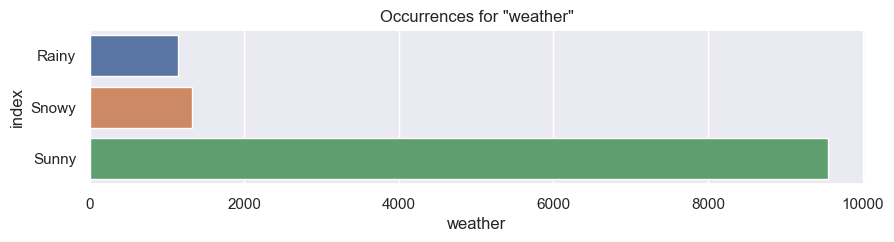


/────────────────────────────────────────  Feature: TEMPERATURE  ────────────────────────────────────────/

|   Unique values for "temperature" |   Occurrences |
|-----------------------------------+---------------|
|                                30 |          2184 |
|                                55 |          3652 |
|                                80 |          6171 |


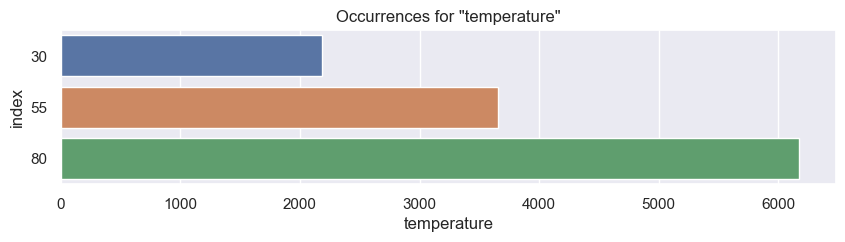


/────────────────────────────────────────  Feature: TIME  ────────────────────────────────────────/

| Unique values for "time"   |   Occurrences |
|----------------------------+---------------|
| 10PM                       |          1896 |
| 2PM                        |          1913 |
| 10AM                       |          2154 |
| 7AM                        |          2976 |
| 6PM                        |          3068 |


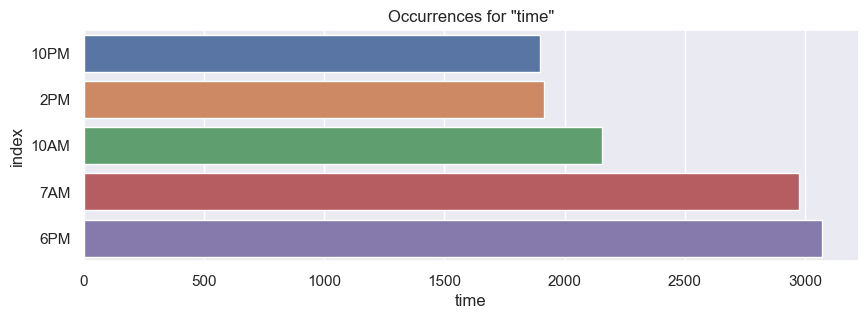


/────────────────────────────────────────  Feature: COUPON  ────────────────────────────────────────/

| Unique values for "coupon"   |   Occurrences |
|------------------------------+---------------|
| Restaurant(20-50)            |          1413 |
| Bar                          |          1906 |
| Carry out & Take away        |          2233 |
| Restaurant(<20)              |          2646 |
| Coffee House                 |          3809 |


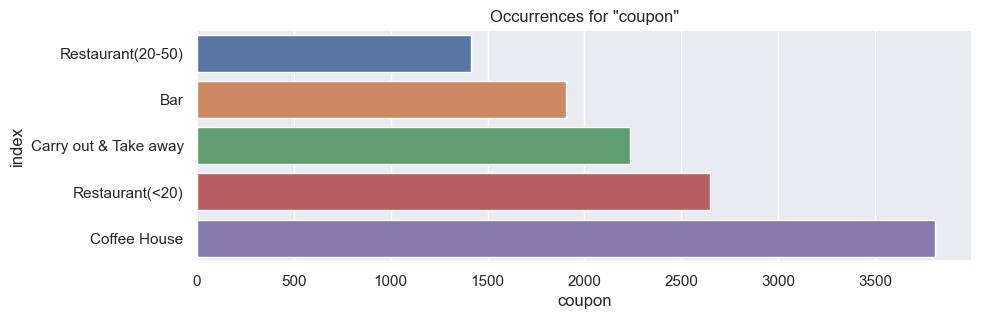


/────────────────────────────────────────  Feature: EXPIRATION  ────────────────────────────────────────/

| Unique values for "expiration"   |   Occurrences |
|----------------------------------+---------------|
| 2h                               |          5305 |
| 1d                               |          6702 |


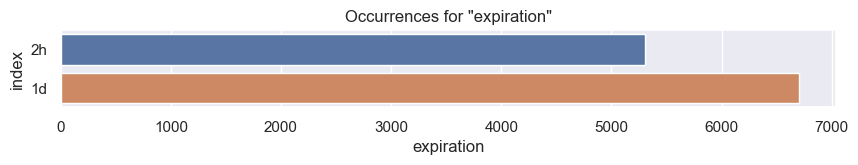


/────────────────────────────────────────  Feature: GENDER  ────────────────────────────────────────/

| Unique values for "gender"   |   Occurrences |
|------------------------------+---------------|
| Male                         |          5849 |
| Female                       |          6158 |


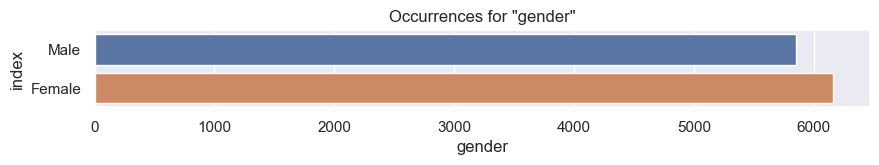


/────────────────────────────────────────  Feature: AGE  ────────────────────────────────────────/

| Unique values for "age"   |   Occurrences |
|---------------------------+---------------|
| below21                   |           502 |
| 46                        |           648 |
| 41                        |          1061 |
| 36                        |          1251 |
| 50plus                    |          1725 |
| 31                        |          1906 |
| 26                        |          2388 |
| 21                        |          2526 |


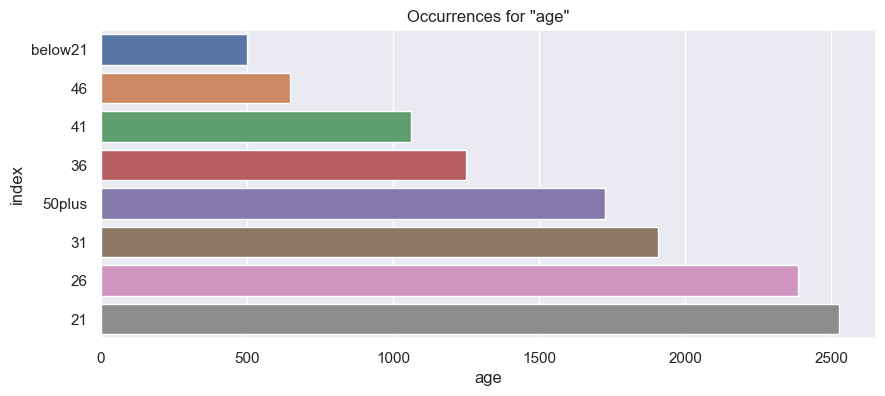


/────────────────────────────────────────  Feature: MARITALSTATUS  ────────────────────────────────────────/

| Unique values for "maritalStatus"   |   Occurrences |
|-------------------------------------+---------------|
| Widowed                             |           108 |
| Divorced                            |           499 |
| Unmarried partner                   |          2047 |
| Single                              |          4554 |
| Married partner                     |          4799 |


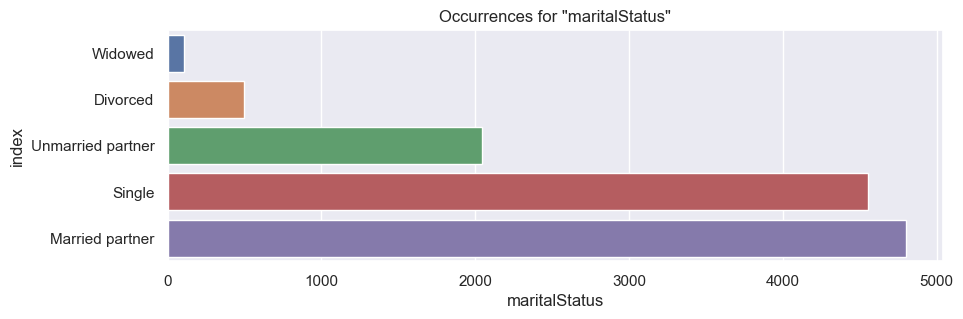


/────────────────────────────────────────  Feature: HAS_CHILDREN  ────────────────────────────────────────/

|   Unique values for "has_children" |   Occurrences |
|------------------------------------+---------------|
|                                  1 |          4909 |
|                                  0 |          7098 |


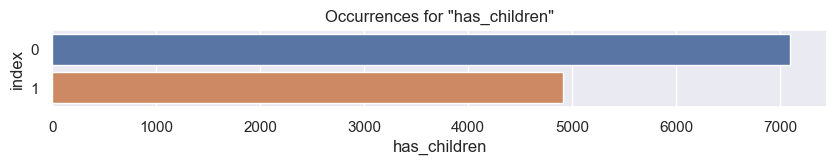


/────────────────────────────────────────  Feature: EDUCATION  ────────────────────────────────────────/

| Unique values for "education"          |   Occurrences |
|----------------------------------------+---------------|
| Some High School                       |            88 |
| High School Graduate                   |           871 |
| Associates degree                      |          1061 |
| Graduate degree (Masters or Doctorate) |          1783 |
| Bachelors degree                       |          4010 |
| Some college - no degree               |          4194 |


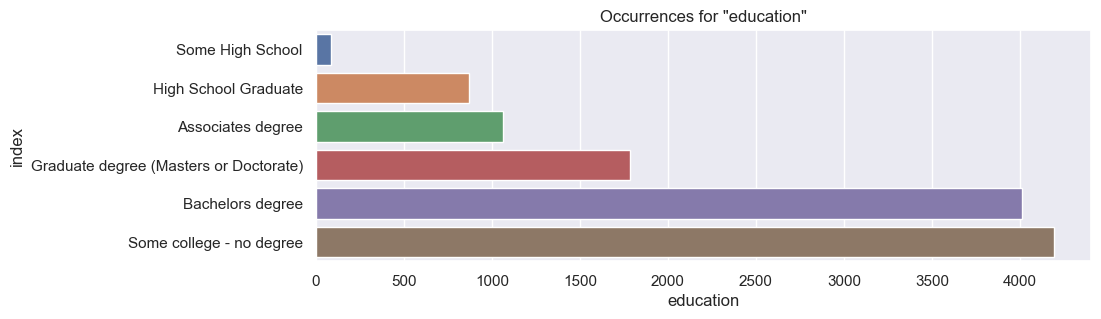


/────────────────────────────────────────  Feature: OCCUPATION  ────────────────────────────────────────/

| Unique values for "occupation"            |   Occurrences |
|-------------------------------------------+---------------|
| Farming Fishing & Forestry                |            43 |
| Building & Grounds Cleaning & Maintenance |            44 |
| Production Occupations                    |            87 |
| Installation Maintenance & Repair         |           133 |
| Personal Care & Service                   |           153 |
| Construction & Extraction                 |           154 |
| Life Physical Social Science              |           169 |
| Protective Service                        |           174 |
| Architecture & Engineering                |           175 |
| Community & Social Services               |           217 |
| Transportation & Material Moving          |           218 |
| Legal                                     |           219 |
| Healthcare Practitione

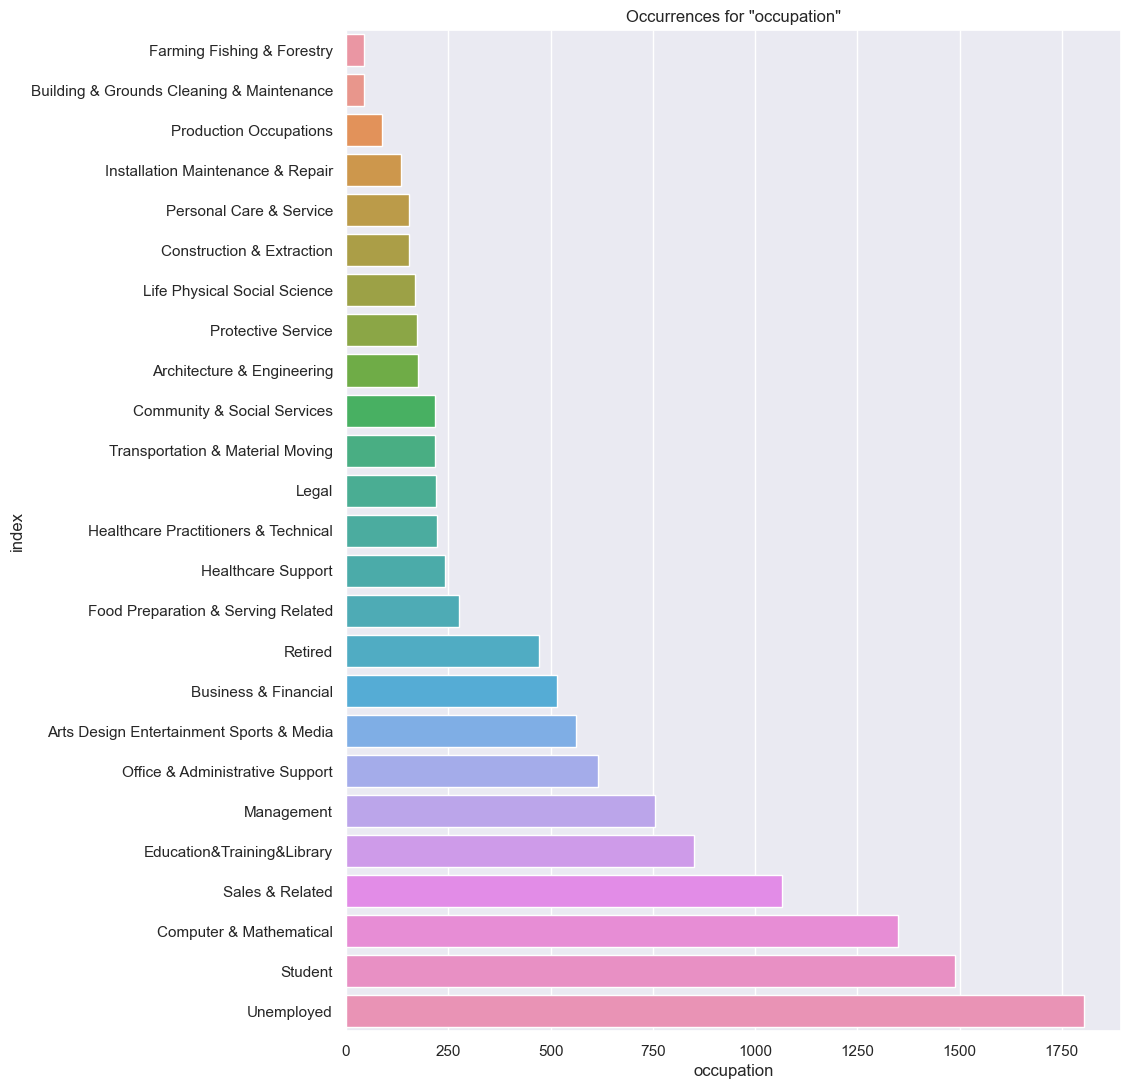


/────────────────────────────────────────  Feature: INCOME  ────────────────────────────────────────/

| Unique values for "income"   |   Occurrences |
|------------------------------+---------------|
| $87500 - $99999              |           803 |
| $75000 - $87499              |           813 |
| $62500 - $74999              |           837 |
| Less than $12500             |          1006 |
| $50000 - $62499              |          1561 |
| $100000 or More              |          1673 |
| $37500 - $49999              |          1680 |
| $12500 - $24999              |          1722 |
| $25000 - $37499              |          1912 |


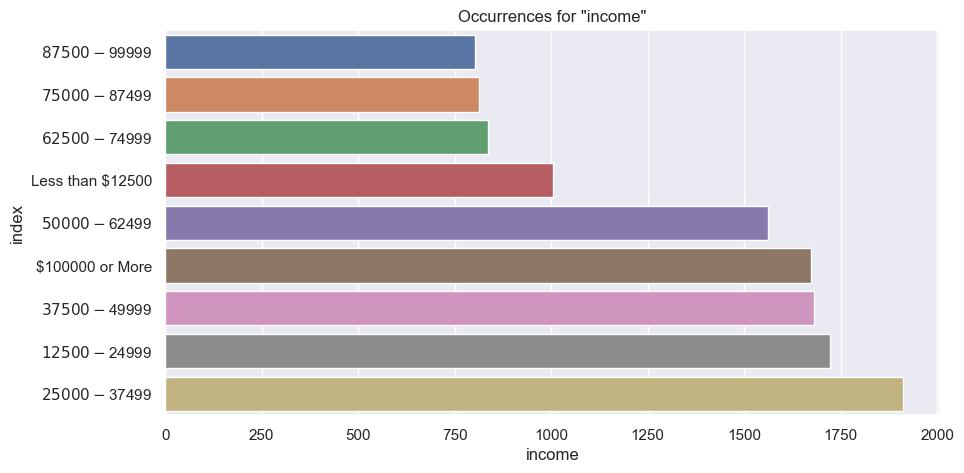


/────────────────────────────────────────  Feature: CAR  ────────────────────────────────────────/

| Unique values for "car"                  |   Occurrences |
|------------------------------------------+---------------|
| crossover                                |            21 |
| Car that is too old to install Onstar :D |            21 |
| Scooter and motorcycle                   |            22 |
| Mazda5                                   |            22 |
| do not drive                             |            22 |


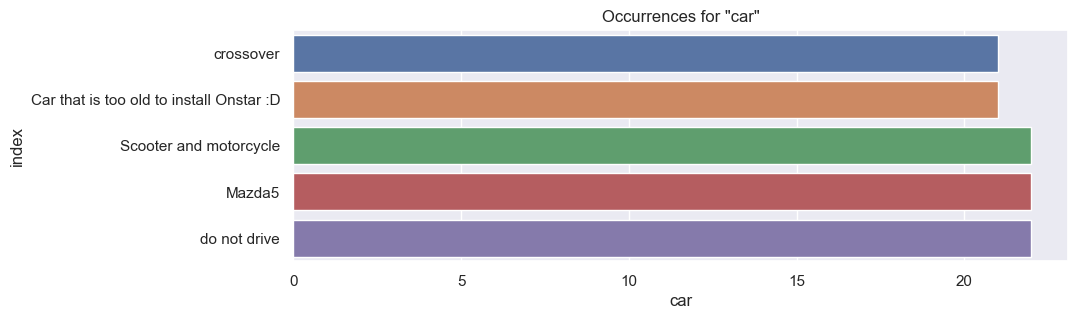


/────────────────────────────────────────  Feature: BAR  ────────────────────────────────────────/

| Unique values for "Bar"   |   Occurrences |
|---------------------------+---------------|
| gt8                       |           326 |
| 4~8                       |          1049 |
| 1~3                       |          2365 |
| less1                     |          3351 |
| never                     |          4916 |


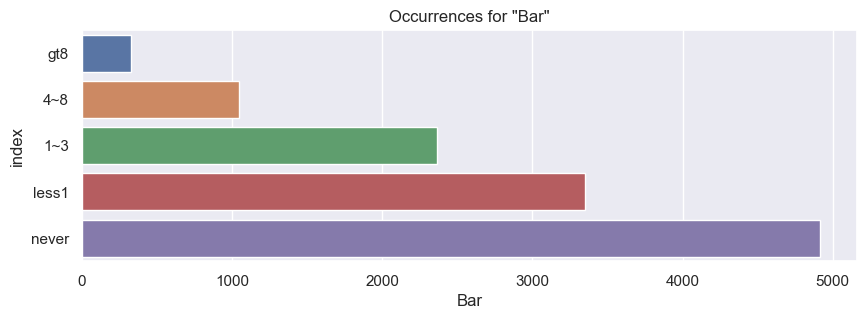


/────────────────────────────────────────  Feature: BAR_COHORT  ────────────────────────────────────────/

| Unique values for "Bar_Cohort"   |   Occurrences |
|----------------------------------+---------------|
| > 3                              |          1375 |
| <= 3                             |         10632 |


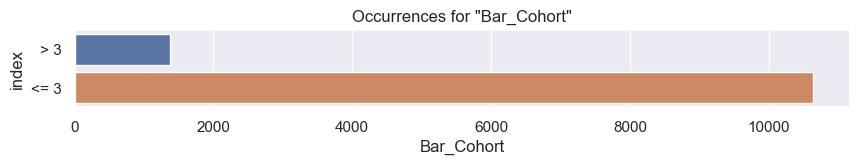


/────────────────────────────────────────  Feature: COFFEEHOUSE  ────────────────────────────────────────/

| Unique values for "CoffeeHouse"   |   Occurrences |
|-----------------------------------+---------------|
| gt8                               |          1107 |
| 4~8                               |          1655 |
| never                             |          2836 |
| 1~3                               |          3133 |
| less1                             |          3276 |


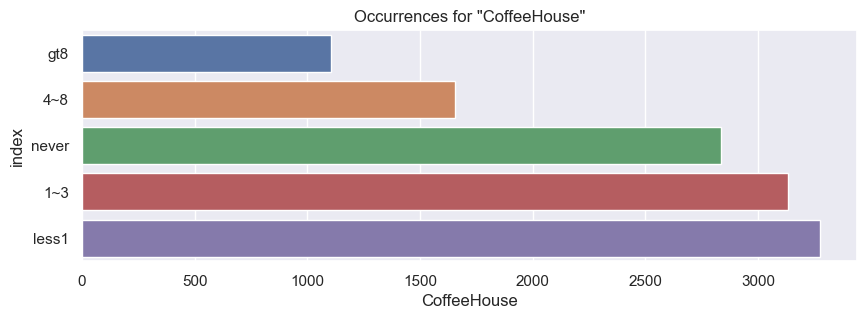


/────────────────────────────────────────  Feature: COFFEEHOUSE_COHORT  ────────────────────────────────────────/

| Unique values for "CoffeeHouse_Cohort"   |   Occurrences |
|------------------------------------------+---------------|
| > 3                                      |          2762 |
| <= 3                                     |          9245 |


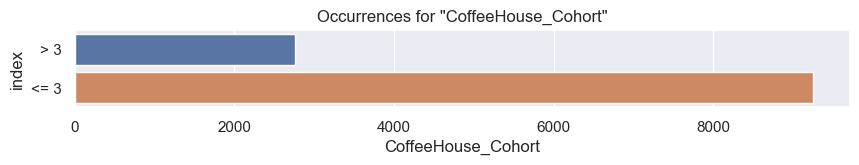


/────────────────────────────────────────  Feature: CARRYAWAY  ────────────────────────────────────────/

| Unique values for "CarryAway"   |   Occurrences |
|---------------------------------+---------------|
| never                           |           130 |
| gt8                             |          1551 |
| less1                           |          1783 |
| 4~8                             |          4068 |
| 1~3                             |          4475 |


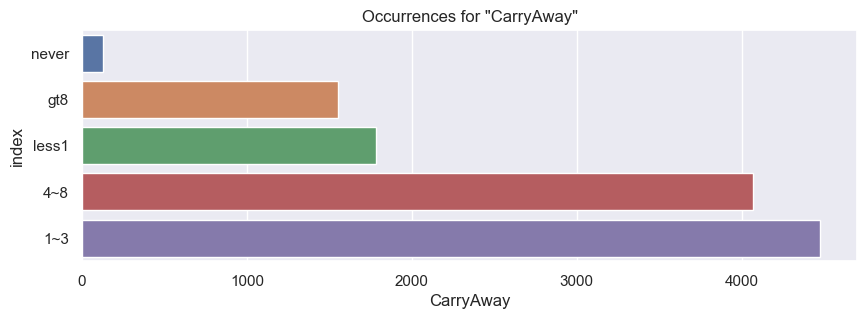


/────────────────────────────────────────  Feature: CARRYAWAY_COHORT  ────────────────────────────────────────/

| Unique values for "CarryAway_Cohort"   |   Occurrences |
|----------------------------------------+---------------|
| > 3                                    |          5619 |
| <= 3                                   |          6388 |


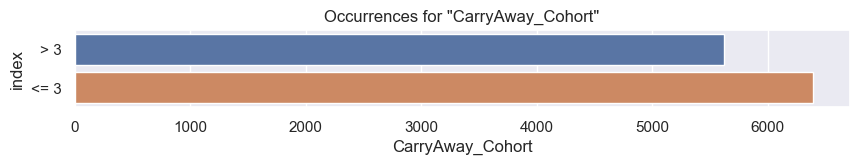


/────────────────────────────────────────  Feature: RESTAURANTLESSTHAN20  ────────────────────────────────────────/

| Unique values for "RestaurantLessThan20"   |   Occurrences |
|--------------------------------------------+---------------|
| never                                      |           175 |
| gt8                                        |          1282 |
| less1                                      |          1983 |
| 4~8                                        |          3424 |
| 1~3                                        |          5143 |


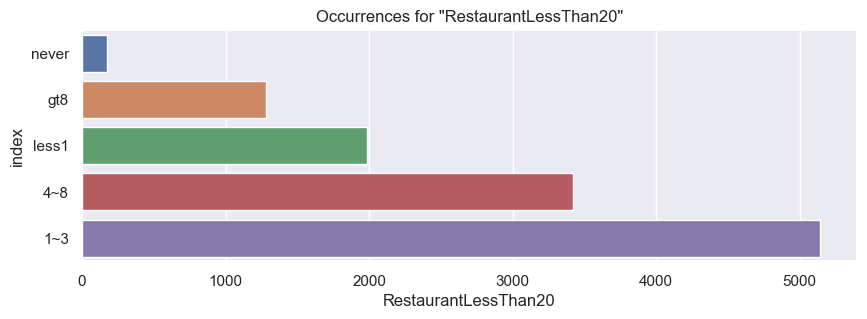


/────────────────────────────────────────  Feature: RESTAURANTLESSTHAN20_COHORT  ────────────────────────────────────────/

| Unique values for "RestaurantLessThan20_Cohort"   |   Occurrences |
|---------------------------------------------------+---------------|
| > 3                                               |          4706 |
| <= 3                                              |          7301 |


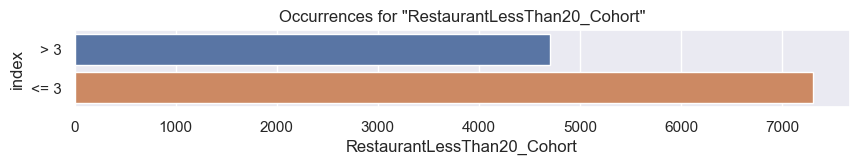


/────────────────────────────────────────  Feature: RESTAURANT20TO50  ────────────────────────────────────────/

| Unique values for "Restaurant20To50"   |   Occurrences |
|----------------------------------------+---------------|
| gt8                                    |           264 |
| 4~8                                    |           684 |
| never                                  |          2056 |
| 1~3                                    |          3178 |
| less1                                  |          5825 |


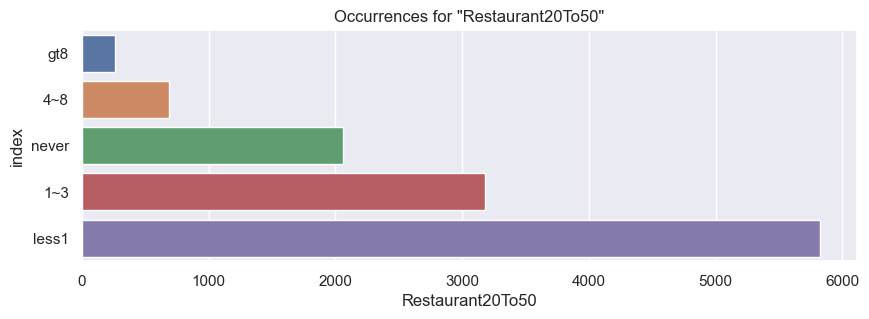


/────────────────────────────────────────  Feature: RESTAURANT20TO50_COHORT  ────────────────────────────────────────/

| Unique values for "Restaurant20To50_Cohort"   |   Occurrences |
|-----------------------------------------------+---------------|
| > 3                                           |           948 |
| <= 3                                          |         11059 |


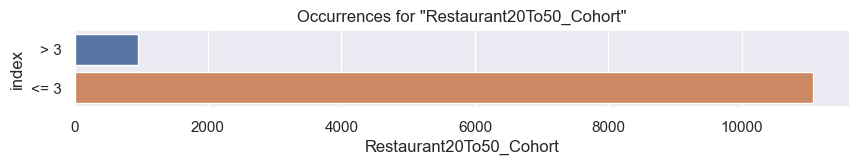


/────────────────────────────────────────  Feature: TOCOUPON_GEQ5MIN  ────────────────────────────────────────/

|   Unique values for "toCoupon_GEQ5min" |   Occurrences |
|----------------------------------------+---------------|
|                                      1 |         12007 |


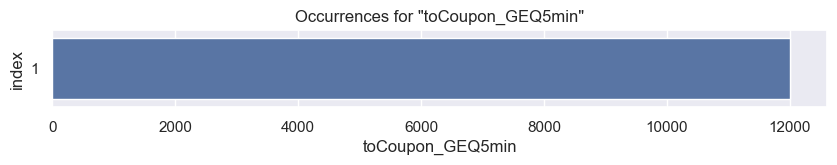


/────────────────────────────────────────  Feature: TOCOUPON_GEQ15MIN  ────────────────────────────────────────/

|   Unique values for "toCoupon_GEQ15min" |   Occurrences |
|-----------------------------------------+---------------|
|                                       0 |          5289 |
|                                       1 |          6718 |


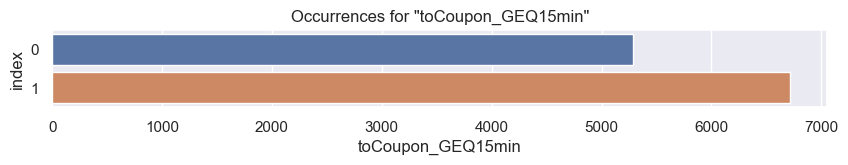


/────────────────────────────────────────  Feature: TOCOUPON_GEQ25MIN  ────────────────────────────────────────/

|   Unique values for "toCoupon_GEQ25min" |   Occurrences |
|-----------------------------------------+---------------|
|                                       1 |          1396 |
|                                       0 |         10611 |


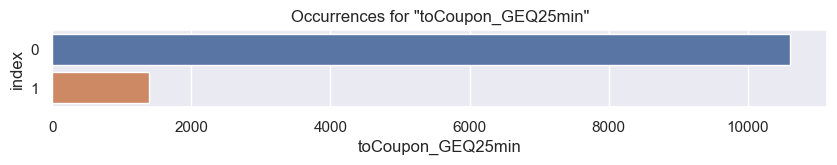


/────────────────────────────────────────  Feature: DIRECTION_SAME  ────────────────────────────────────────/

|   Unique values for "direction_same" |   Occurrences |
|--------------------------------------+---------------|
|                                    1 |          2593 |
|                                    0 |          9414 |


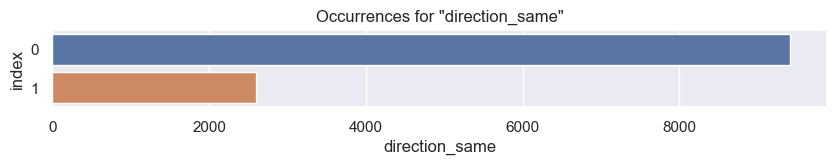


/────────────────────────────────────────  Feature: DIRECTION_OPP  ────────────────────────────────────────/

|   Unique values for "direction_opp" |   Occurrences |
|-------------------------------------+---------------|
|                                   0 |          2593 |
|                                   1 |          9414 |


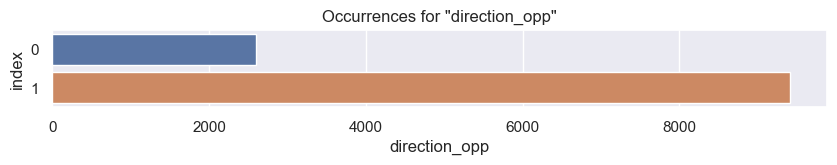


/────────────────────────────────────────  Feature: Y  ────────────────────────────────────────/

|   Unique values for "Y" |   Occurrences |
|-------------------------+---------------|
|                       0 |          5182 |
|                       1 |          6825 |


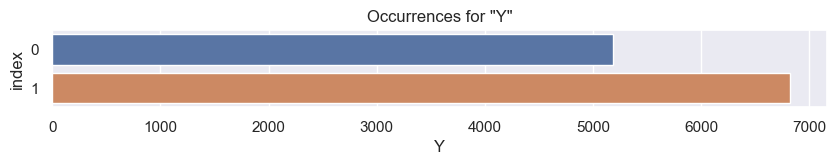

In [45]:
# We will plot each data feature's unique values against their observed counts
# to better understand distribution of each feature

# Iterate through all columns in the dataset, creating a subplot for each
for i in data.columns:
   
    # For each column:
    # 1. Visual separation between iterated columns/features
    print('\n/' + ('─' * 40) + f'  Feature: {i.upper()}  ' + ('─' * 40) + "/\n")

    # 2. get the unique value counts for the feature
    # 3. push it into a dataframe
    # 4. sort values by counts to maintain visual reading consistency in each plot (ascending value counts)
    # 5. print the values and their occurrence counts for tabular reference
    data_values = pd.DataFrame(data[i].value_counts()).sort_values(i)
    print(tabulate(data_values, headers=[f'Unique values for "{i}"', 'Occurrences'], tablefmt="orgtbl"))
    
    # 6. reset the index such that the values are plottable
    data_values = data_values.reset_index()

    # 7. generate the plot for each temporary dataframe representing value counts
    plt.figure(figsize=(10,np.ceil(len(data_values.index)/2)))
    sns.barplot(x=i, y="index", data=data_values, orient='h').set_title('Occurrences for "' + i + '"')
    plt.show()
    
# Clean up: Release the plots from memory
plt.close()


---
> ##### Insights/Observations: Univariate Analysis
From reviewing the feature plots representing occurrences of each's unique values (above), the following is observed:
> * Most targeted drivers/customers:
>   * were either unemployed or students (`occupation`)
>   * were young adults, between ages 21-31 (`age`)
>   * were driving predominantly driving alone, with no urgent place to go, in hot and sunny weather (`passenger`, `destination`, `weather`, `temperature`)
>   * were fairly comparable in gender and slightly favored those without children (`gender`, `has_children`)
>   * either had some college education or held an undergraduate degree (`education`)
>   * made almost, or less than half of the [average US Househould income](https://www.statista.com/statistics/203183/percentage-distribution-of-household-income-in-the-us/ "from: Statista.com") (`income`)
> * Most coupons offered were:
>   * to businesses at least 5 minutes away, largely between 15-25 minutes from the driver's location, but in the opposite direction they were travelling in (`toCoupon_GEQ*`, `direction*`)
>   * largely offered during peak driving times (in the US), at 7am and 6pm (`time`)
>   * to coffee shops, followed by less expensive restaurants (`coupon`)
>   * targeting drivers that infrequently went the different businesses types offered (`Bar`, `CoffeeHouse`, `CarryAway`, `RestaurantsLessThan20`, `Restaurant20To50`)
> * As previously mentioned:
>   * we can only consider one of the two `direction*` features as they are inverses of each other
>   * we will treat `car` feature as anecdotal information, due to significant missing data
>
> ##### For further review: Evaluate through bivariate/multivariate analysis 
> 1. Perhaps the coupons are sent too late *(geo-fencing/trigger time improvement?)*, as most destinations seem to be in the opposite direction travelled according to the `direction*` features. 
> 2. Determine if the coupon types correlate to time of day, e.g. 7am coupons were for coffee shops, 10pm coupons were for bars or take away.
> 3. Determine how many lower-income drivers accepted the coupons, perhaps indicating discretionary spending trends.
> 4. Determine if the coupon offered to a driver correlates to low visit frequency to the same type of business, suggesting a new customer acquisition advertising strategy (as opposed to building loyalty in, or rewarding, more frequent visitors).
> 5. How do the value rankings within each feature change/correlate when we apply context of coupon acceptance?
---

---
> ##### 2.5. Explore numerical features for correlations (Multivariate analysis)
---

In [18]:
# Explore statistical analysis of numerical values within features
data.describe([.6, .7, .8, .9, .95, .99])

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12610.000000,12610.000000,12610.0,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000
mean,63.267248,0.414512,1.0,0.559794,0.116019,0.215543,0.784457,0.567565
std,19.153386,0.492657,0.0,0.496432,0.320260,0.411215,0.411215,0.495434
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
60%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
70%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
80%,80.000000,1.000000,1.0,1.000000,0.000000,1.000000,1.000000,1.000000
90%,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
95%,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


<Figure size 1000x600 with 0 Axes>

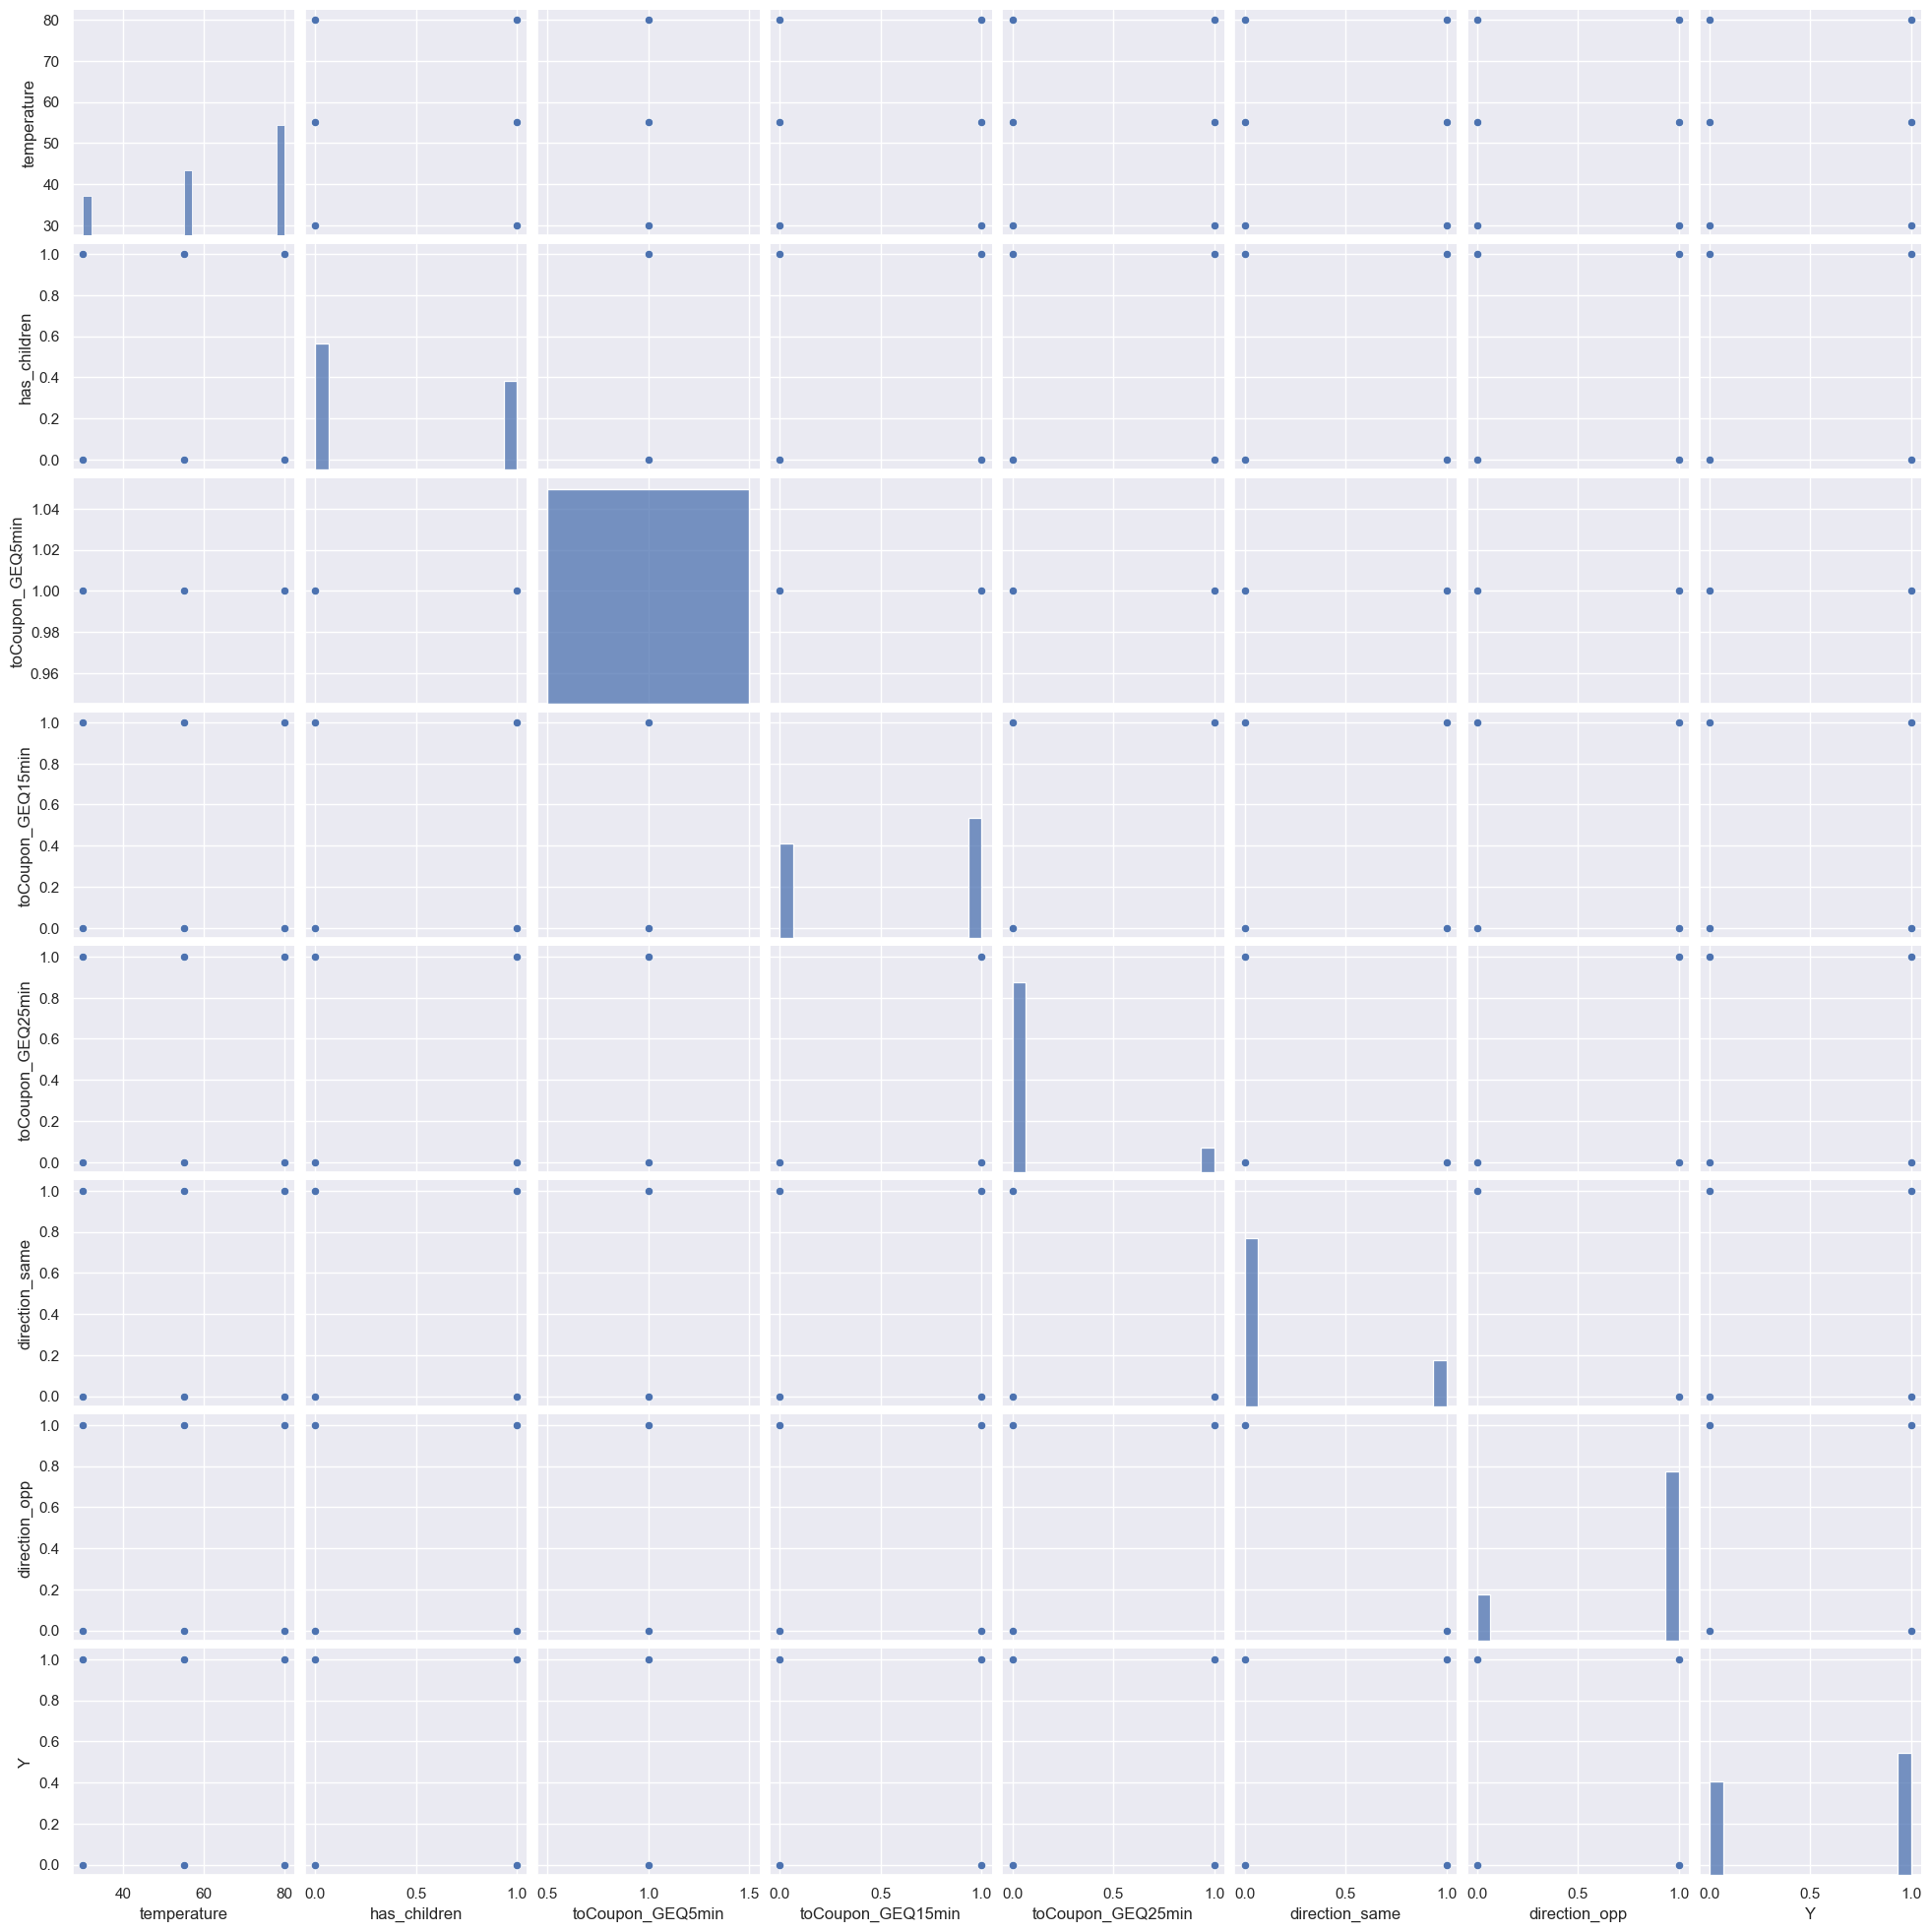

In [19]:
# Let's take a multivariate visual reference of numerical features through pairplotting
plt.figure(figsize=(10,6));
sns.pairplot(data);

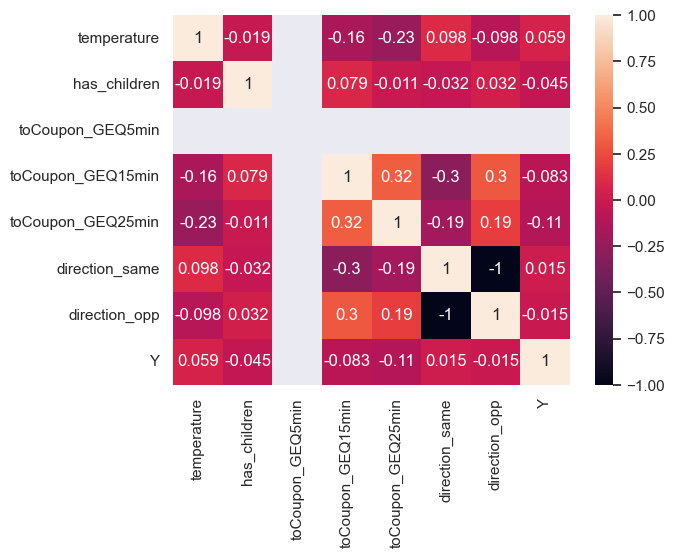

In [20]:
# Let's understand any correlations via heatmap
sns.heatmap(data.corr(), annot=True);


In [21]:
# Dive into the distance feature, which currently seems to be represented by 3 different columns.
# Examine all three columns to understand the population logic.

# First, let's get the relevant columns that contain "toCoupon_GEQ" in their name, 
# and then convert the object to a list
distance_cols = data.columns[data.columns.str.contains("toCoupon_GEQ")].tolist()

# Now, let's see how these values are populated for both coupon accepted/not accepted cohorts,
# reviewing the sum and mean
data.groupby("Y")[distance_cols].agg(["sum", "mean"])

toCoupon_GEQ5min      toCoupon_GEQ15min           toCoupon_GEQ25min  \
               sum mean               sum      mean               sum   
Y                                                                       
0             5453  1.0              3309  0.606822               849   
1             7157  1.0              3750  0.523963               614   

             
       mean  
Y            
0  0.155694  
1  0.085790

---
> ##### Insights/Observations: Numerical Multivariate Analysis
> * The strong (1:1) negative correlation between `direction_same` and `direction_opp` is expected (by design), thus we can ignore one of the columns in futher reviews.
> * From the above review of **_numerical features_**, there are no other valuable strong negative or positive correlations observed. 
> * The `toCoupon_GEQ*` maching columns seem to be inclusive of the smaller distances (e.g. "5min" = 1 when distance was "15min". There may be benefit to creating a new categorical data feature from the "GEQ" collection of columns that derives the furthest tallied distance
---

---
> ##### 2.6. Explore categorical features for correlations (Multivariate analysis)
---

In [22]:
# What does the total population look like?
data.describe(include="O")


,destination,passenger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,car,Bar,Bar_Cohort,CoffeeHouse,CoffeeHouse_Cohort,CarryAway,CarryAway_Cohort,RestaurantLessThan20,RestaurantLessThan20_Cohort,Restaurant20To50,Restaurant20To50_Cohort
count,12610,12610,12610,12610,12610,12610,12610,12610,12610,12610,12610,12610,108,12503,12503,12393,12393,12460,12460,12481,12481,12421,12421
unique,3,4,3,5,5,2,2,8,5,6,25,9,5,5,2,5,2,5,2,5,2,5,2
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,1d,Female,21,Married partner,Some college - no degree,Unemployed,$25000 - $37499,Scooter and motorcycle,never,<= 3,less1,<= 3,1~3,<= 3,1~3,<= 3,less1,<= 3
freq,6266,7248,10011,3220,3989,7031,6469,2642,5068,4325,1861,2006,22,5178,11084,3362,9507,4645,6646,5356,7646,6041,11429


In [23]:
# How about for only those that accepted a coupon?
data.query("Y == 1").describe(include="O")

,destination,passenger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,car,Bar,Bar_Cohort,CoffeeHouse,CoffeeHouse_Cohort,CarryAway,CarryAway_Cohort,RestaurantLessThan20,RestaurantLessThan20_Cohort,Restaurant20To50,Restaurant20To50_Cohort
count,7157,7157,7157,7157,7157,7157,7157,7157,7157,7157,7157,7157,62,7102,7102,7047,7047,7057,7057,7068,7068,7052,7052
unique,3,4,3,5,5,2,2,8,5,6,25,9,5,5,2,5,2,5,2,5,2,5,2
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,1d,Male,21,Single,Some college - no degree,Unemployed,$25000 - $37499,Car that is too old to install Onstar :D,never,<= 3,1~3,<= 3,1~3,<= 3,1~3,<= 3,less1,<= 3
freq,3969,3801,5941,1881,1989,4390,3622,1579,2851,2577,1019,1190,17,2751,6220,2089,5276,2693,3695,2994,4214,3363,6400


In [24]:
# And conversely, how about for only those that did not accept any coupon?
data.query("Y == 0").describe(include="O")

,destination,passenger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,car,Bar,Bar_Cohort,CoffeeHouse,CoffeeHouse_Cohort,CarryAway,CarryAway_Cohort,RestaurantLessThan20,RestaurantLessThan20_Cohort,Restaurant20To50,Restaurant20To50_Cohort
count,5453,5453,5453,5453,5453,5453,5453,5453,5453,5453,5453,5453,46,5401,5401,5346,5346,5403,5403,5413,5413,5369,5369
unique,3,4,3,5,5,2,2,8,5,6,25,9,5,5,2,5,2,5,2,5,2,5,2
top,No Urgent Place,Alone,Sunny,7AM,Coffee House,2h,Female,21,Married partner,Bachelors degree,Unemployed,$25000 - $37499,crossover,never,<= 3,never,<= 3,1~3,<= 3,1~3,<= 3,less1,<= 3
freq,2297,3447,4070,1561,2000,2812,2934,1063,2319,1928,842,816,13,2427,4864,1598,4231,1952,2951,2362,3432,2678,5029


3. Decide what to do about your missing data -- drop, replace, other...

In [25]:
# What would our dataset look like if we aggressively dropped all NaN records?

print("Percentage lost data if we dropped all NaNs: " + 
      str(round((1-(data.dropna().shape[0]/data.shape[0])) * 100)) + "%")

# What would our dataset look like if we dropped all NaN records excluding those from the `car` column?
print("\nPercentage lost data if we dropped all NaNs, except from `car` column: " + 
      str(round((1-(data.dropna(subset=data.columns.difference(['car'])).shape[0]/data.shape[0])) * 100)) + "%")


Percentage lost data if we dropped all NaNs: 99%

Percentage lost data if we dropped all NaNs, except from `car` column: 5%


---
> ##### Insights/Observations: Treating Missing Data
> While it would be nice to remove all missing data to retain a fully populated set, the decisions from our investigation in 2.4 (above) are as follows:
> * `car` feature review:
>   * **Analysis:** It contains ***more than 99% missing values***, and cannot consider it in modeling even if it would be valuable information.
>   * **Decision:** Rather than drop it, ***keep it for now*** in case there's further granular (anecdotal) insights as we dive deeper
> * `CoffeeHouse` feature review:
>   * **Analysis:** It contains ***less than 2% missing values***, a reasonably minor amount to either drop or interpolate (replacing NaNs with "lowest" categorical value, e.g. "never"). Inferring "never" as an replacement for missing values would be equivicol, as it presumes a preference. 
>   * **Decision:** As this visiting preference will be used later in this evaluation, ***missing data will be dropped***, as to not incorrectly skew any analysis that includes this preference.
> * `Restaurant20To50` feature review:
>   * **Analysis:** It contains ***less than 1.5% missing values***, a reasonably minor amount to either drop or interpolate (replacing NaNs with "lowest" categorical value, e.g. "never"). Inferring "never" as an replacement for missing values would be equivicol, as it presumes a preference. 
>   * **Decision:** As this visiting preference will be used later in this evaluation, ***missing data will be dropped***, as to not incorrectly skew any analysis that includes this preference.
> * `CarryAway` feature review:
>   * **Analysis:** It contains ***less than 1.2% missing values***, a reasonably minor amount to either drop or interpolate (replacing NaNs with "lowest" categorical value, e.g. "never"). Inferring "never" as an replacement for missing values would be equivicol, as it presumes a preference. 
>   * **Decision:** As this visiting preference will be used later in this evaluation, ***missing data will be dropped***, as to not incorrectly skew any analysis that includes this preference.
> * `RestaurantLessThan20` feature review:
>   * **Analysis:** It contains ***less than 1.1% missing values***, a reasonably minor amount to either drop or interpolate (replacing NaNs with "lowest" categorical value, e.g. "never"). Inferring "never" as an replacement for missing values would be equivicol, as it presumes a preference. 
>   * **Decision:** As this visiting preference will be used later in this evaluation, ***missing data will be dropped***, as to not incorrectly skew any analysis that includes this preference.
> * `Bar` feature review:
>   * **Analysis:** It contains ***less than 1% missing values***, a reasonably minor amount to either drop or interpolate (replacing NaNs with "lowest" categorical value, e.g. "never"). Inferring "never" as an replacement for missing values would be equivicol, as it presumes a preference. 
>   * **Decision:** As this visiting preference will be used later in this evaluation, ***missing data will be dropped***, as to not incorrectly skew any analysis that includes this preference.
>
> ##### For future review:
> * Seek any additional data/correlations to interpolate values for `car`
> * Can the missing data for visits (`CoffeeHouse`, `Restaurant20To50`, `CarryAway`, `RestaurantLessThan20`, `Bar`) be interpolated some correlative means, as statistical interpolation would not be appropriate for the categorical values (converting category values to numerical representation would be incorrect, based on the implied ranges)
---

In [26]:
# Drop all missing data, excluding the `car` column
data = data.dropna(subset=data.columns.difference(['car']))
data.shape

(12007, 31)

4. What proportion of the total observations chose to accept the coupon? 



Proportion of total observations that have accepted the coupon: 57%


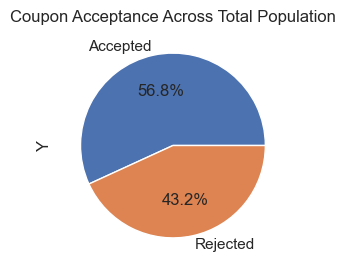

In [27]:
# First, let's identify how many customers (total population) accepted or rejected a coupon
coupon_acceptance = data["Y"].value_counts(normalize=True)

# Then, let's get a quick visual reference by viewing the percentage of response in a "pie" chart
plt.figure(figsize=(6, 3))
coupon_acceptance.plot(labels=["Accepted", "Rejected"], kind="pie", autopct='%1.1f%%')\
        .set_title("Coupon Acceptance Across Total Population");

print("Proportion of total observations that have accepted the coupon: " 
      + str(round(coupon_acceptance[1]*100)) + "%")


5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 0, 'Number of Coupons Offered')

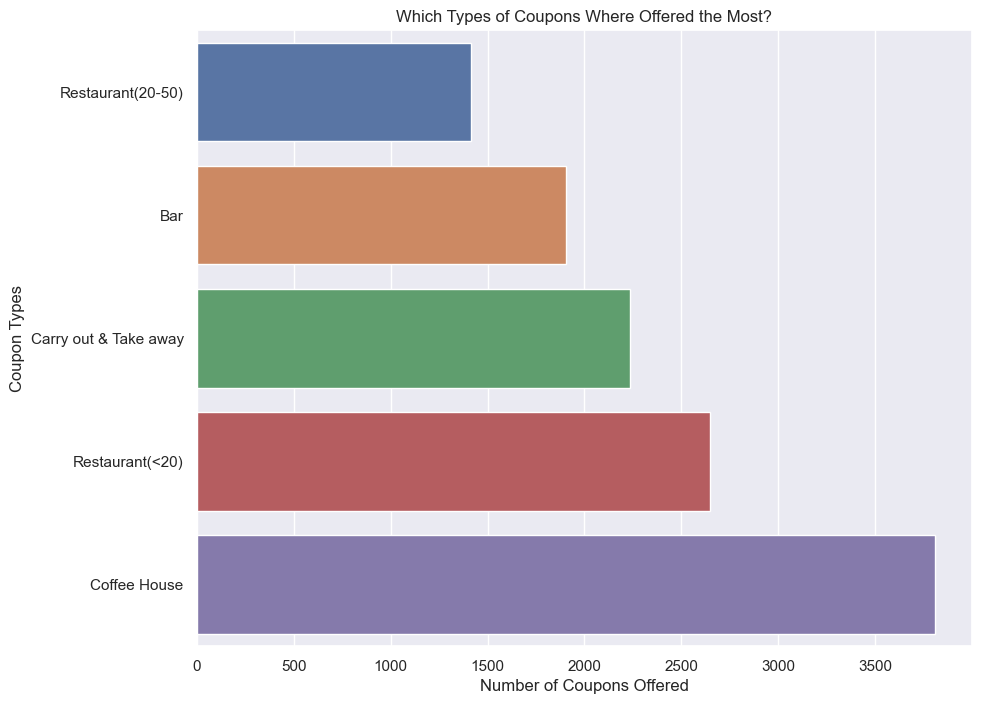

In [28]:
# Following the same procedure as above for iterative univariate analysis, focusing on `coupon` feature
# 1. get the unique value counts for the feature
# 2. push it into a dataframe
# 3. reset the index such that the values are plottable
# 4. sort values by counts to maintain visual reading consistency in each plot (ascending value counts)
coupon_values = pd.DataFrame(data["coupon"].value_counts()).reset_index().sort_values("coupon")

# Generate the plot representing value counts
plt.figure(figsize = (10,8))
sns.barplot(x="coupon", y="index", data=coupon_values, orient='h').set_title('Which Types of Coupons Where Offered the Most?')
plt.ylabel("Coupon Types")
plt.xlabel("Number of Coupons Offered")


,Accepted,Rejected,Percent Accepted,Percent Rejected
coupon,,,,
Bar,785,1121,41.0,59.0
Carry out & Take away,1643,590,74.0,26.0
Coffee House,1888,1921,50.0,50.0
Restaurant(20-50),631,782,45.0,55.0
Restaurant(<20),1878,768,71.0,29.0


<Figure size 1000x800 with 0 Axes>

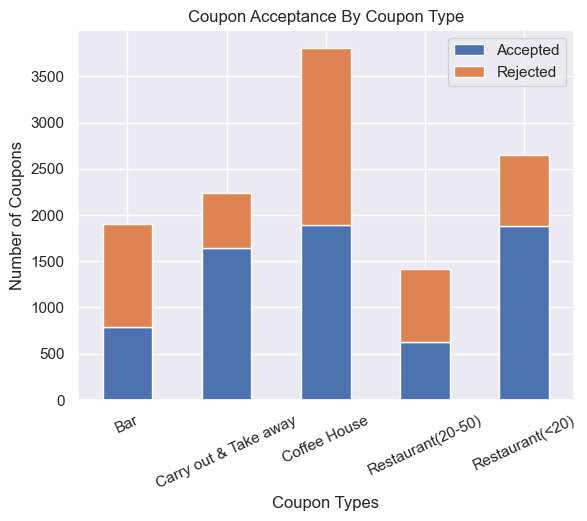

In [195]:
# Then, let's add context of how many offered, were accepted for each coupon type
# Our approach varies for Seaborn vs. Matplotlib

plt.figure(figsize = (10,8))

#/--------------- Seaborn approach -----------------/#

# Seaborn: We'll segment the data by:
# 1. Group by both `coupon` and `Y`
# 2. get the size() of each grouping as our frequency/count value to
# 3. Transform ambiguous column name for the Count
# 4. Reset the index so `coupon` types are plottable
# 5. Sort by coupon type and acceptance to keep data visually consistent
#coupon_values_accepted = pd.DataFrame(data.groupby(["coupon", "Y"]).size()).rename(columns={0:"Counts"}).reset_index().sort_values(["coupon", "Y"])

# Generate the plot representing Counts for each grouping, using Y as the *hue*
#sns.barplot(x="Counts", y="coupon", hue="Y", data=coupon_values_accepted, orient='h')\
#    .set_title('Which Types of Coupons Where Offered the Most?')

##==> No stacked barplots in Seaborn, abandoning for Matplotlib

#/--------------- Matplotlib approach ----------------/#

# Matplotlib: We'll segment the data by:
# 1. Create one dataframe querying dataset for accepted coupons, grouped by coupon
# 2. Create another dataframe querying dataset for rejected coupons, grouped by coupon
# 3. get value counts for each as the accepted and rejected frequency/counts
# 3. Transform ambiguous column name for the Accepted/Rejected, respectively
# 4. Merge both dataframes into a new dataframe to create a plottable set (merged on shared index, coupon type)
# 5. Plot as stacked bar chart, add labeling details

# Amount accepted, by coupon type
coupon_values_accepted_only = pd.DataFrame(data.query("Y == 1").groupby("coupon")["Y"].value_counts())\
                                .rename(columns={"Y":"Accepted"})

# Amount rejected, by coupon type
coupon_values_rejected_only = pd.DataFrame(data.query("Y == 0").groupby("coupon")["Y"].value_counts())\
                                .rename(columns={"Y":"Rejected"})

# Merge the temporary dataframes
coupon_values_acceptance = coupon_values_accepted_only.merge(coupon_values_rejected_only, on="coupon")
coupon_values_acceptance.plot.bar(stacked=True, title='Coupon Acceptance By Coupon Type')
plt.xlabel("Coupon Types")
plt.ylabel("Number of Coupons")
plt.xticks(rotation=25)

# let's also look at the percentages for accepted/rejected
coupon_values_acceptance.insert(2, "Percent Accepted", round(coupon_values_acceptance["Accepted"]/(coupon_values_acceptance["Accepted"] + coupon_values_acceptance["Rejected"])*100))
coupon_values_acceptance.insert(3, "Percent Rejected", round(coupon_values_acceptance["Rejected"]/(coupon_values_acceptance["Accepted"] + coupon_values_acceptance["Rejected"])*100))
coupon_values_acceptance


6. Use a histogram to visualize the temperature column.

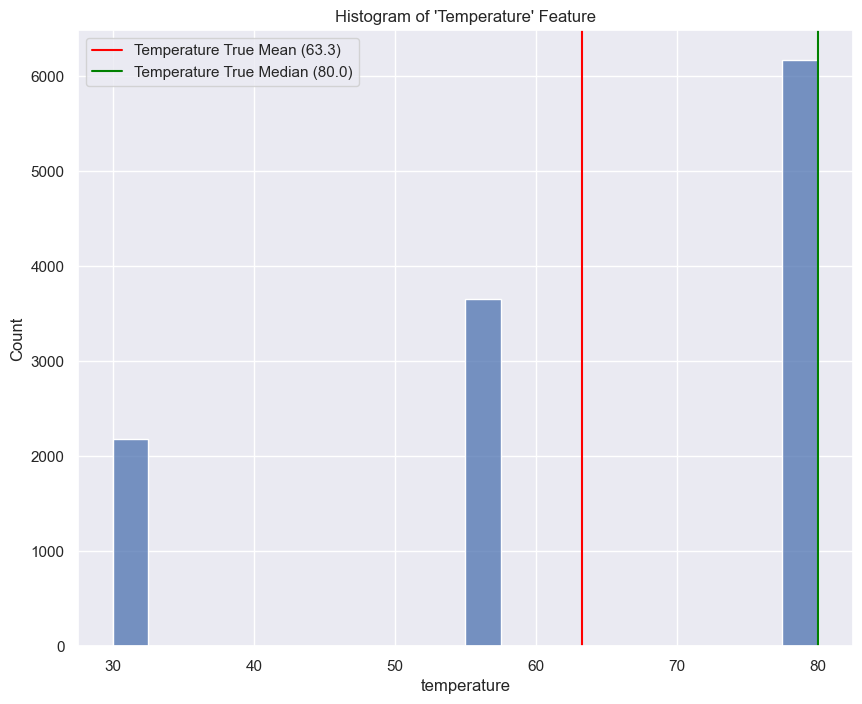

In [30]:
# Calculate the true Mean and Median for Temperature feature
hist_temperature_mean = round(data["temperature"].mean(),2)
hist_temperature_median = data["temperature"].median()

# plot histogram of 'temperature' values
plt.figure(figsize = (10,8))
sns.histplot(data["temperature"], bins=20);
plt.axvline(x = hist_temperature_mean, label = "Temperature True Mean (" + str(hist_temperature_mean) + ")", color = "red");
plt.axvline(x = hist_temperature_median, label = "Temperature True Median (" + str(hist_temperature_median) + ")", color = "green")
plt.title("Histogram of 'Temperature' Feature")

plt.legend()
plt.show();

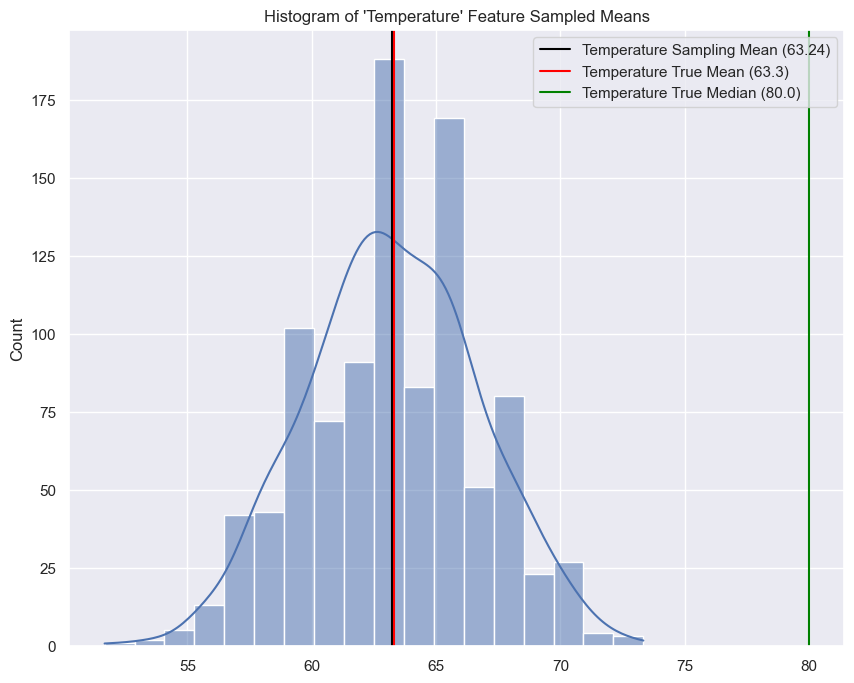

In [31]:
# defining an empty list to sample temperature means
hist_temperature_mean_list = []

# Iterate over a range to determine the sampled mean for Temperature feature (in this case, 1000 observations)
for temp_sample in range(1,1000):
        # append the mean of a sampling from the Temperature feature, 
        # in this case, 30 samples from the set
        
        hist_temperature_mean_list.append(round(data["temperature"].sample(30, random_state = temp_sample, 
            replace=True).mean(),3))
        
        
# print the mean
temp_sample_mean = round(np.mean(hist_temperature_mean_list),2)


plt.figure(figsize = (10,8))
sns.histplot(hist_temperature_mean_list, kde = True, bins = 18);
plt.axvline(x = temp_sample_mean, color = "black", label = "Temperature Sampling Mean (" + str(temp_sample_mean) + ")")
plt.axvline(x = hist_temperature_mean, label = "Temperature True Mean (" + str(hist_temperature_mean) + ")", color = "red");
plt.axvline(x = hist_temperature_median, label = "Temperature True Median (" + str(hist_temperature_median) + ")", color = "green")
plt.title("Histogram of 'Temperature' Feature Sampled Means")

plt.legend()
plt.show();

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [32]:
coupon_bar = data.query('coupon == "Bar"')
coupon_bar.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,Bar_Cohort,CoffeeHouse,CoffeeHouse_Cohort,CarryAway,CarryAway_Cohort,RestaurantLessThan20,RestaurantLessThan20_Cohort,Restaurant20To50,Restaurant20To50_Cohort,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,NaN,never,<= 3,less1,<= 3,4~8,> 3,4~8,> 3,less1,<= 3,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,NaN,never,<= 3,less1,<= 3,4~8,> 3,4~8,> 3,less1,<= 3,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,NaN,never,<= 3,less1,<= 3,4~8,> 3,4~8,> 3,less1,<= 3,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,0,Some college - no degree,Student,$12500 - $24999,NaN,never,<= 3,4~8,> 3,1~3,<= 3,1~3,<= 3,never,<= 3,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,0,Some college - no degree,Student,$12500 - $24999,NaN,never,<= 3,4~8,> 3,1~3,<= 3,1~3,<= 3,never,<= 3,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


---
> ##### Presumption: 
> The question asks to determine the acceptance rate for bar coupons offered to the entire data population 
---

Proportion of observations that have accepted a `Bar` coupon: 41%


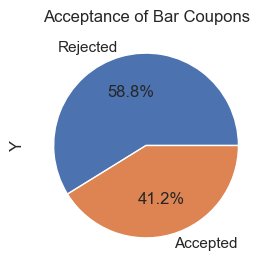

In [33]:
# As in Question (#4), let's evaluate the value distribution for coupon acceptance ("Y")
coupon_bar_accepted = coupon_bar["Y"].value_counts(normalize=True)

# Then, let's get a quick visual reference by viewing the percentage of response in a "pie" chart
plt.figure(figsize=(6, 3))
coupon_bar_accepted.plot(labels=["Rejected", "Accepted"], kind="pie", autopct='%1.1f%%')\
        .set_title("Acceptance of Bar Coupons");

print("Proportion of observations that have accepted a `Bar` coupon: " 
      + str(round(coupon_bar_accepted[1]*100)) + "%")

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

---
> ##### Presumption: 
> While not explicitly stated above, the approaches below presume all `Bar` visit ranges are in the context of a ___"monthly"___ time frame
>
> The question asks to compare bar coupon acceptance rates between the following cohort population, against it's inverse set:
> * 3 or less bar visits/month
---

In [34]:
# First let's remind ourselves what the "Bar" column looks like:
coupon_bar["Bar"].value_counts()

never    788
less1    546
1~3      379
4~8      147
gt8       46
Name: Bar, dtype: int64

Ratio of coupon acceptance rates for those that visited a bar '> 3' versus '<= 3' is: 2


,Cohort,Accepted,Total,Acceptance Percentage
0,<= 3,638,1713,37.244600
1,> 3,147,193,76.165803


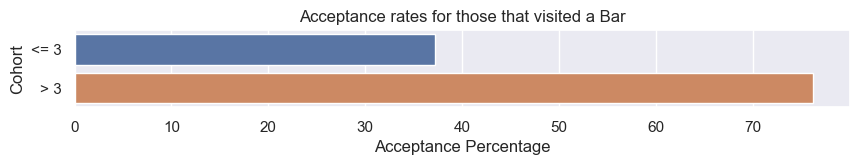

In [136]:
# Using the `Bar_Cohorts` column created above,
# query the bar coupon data for acceptance rate for "> 3" population
bar_cohorts_gt3_accepted = len(coupon_bar.query("Bar_Cohort == '> 3' and Y == 1"))
bar_cohorts_gt3_total = len(coupon_bar.query("Bar_Cohort == '> 3'"))
bar_cohorts_gt3_acceptance_rate = bar_cohorts_gt3_accepted / bar_cohorts_gt3_total * 100

# Query the bar coupon data for acceptance rate for "<= 3" population
bar_cohorts_lte3_accepted = len(coupon_bar.query("Bar_Cohort == '<= 3' and Y == 1"))
bar_cohorts_lte3_total = len(coupon_bar.query("Bar_Cohort == '<= 3'"))
bar_cohorts_lte3_acceptance_rate = bar_cohorts_lte3_accepted / bar_cohorts_lte3_total * 100

# Create a new dataframe with accepted, total, and acceptance rate 
# for both populations to understand how they compare

bar_cohorts_compare_acceptance = pd.DataFrame(
            data = {"Cohort":["<= 3", "> 3"],
                    "Accepted":[bar_cohorts_lte3_accepted, bar_cohorts_gt3_accepted],
                    "Total":[bar_cohorts_lte3_total, bar_cohorts_gt3_total],
                    "Acceptance Percentage":[bar_cohorts_lte3_acceptance_rate, bar_cohorts_gt3_acceptance_rate]
                   })

plt.figure(figsize=(10,1))
sns.barplot(data=bar_cohorts_compare_acceptance, y="Cohort", x="Acceptance Percentage", orient="h").set_title("Acceptance rates for those that visited a Bar")
print("Ratio of coupon acceptance rates for those that visited a bar '> 3' versus '<= 3' is: " + str(round(bar_cohorts_gt3_acceptance_rate/bar_cohorts_lte3_acceptance_rate)))
bar_cohorts_compare_acceptance


---
> ##### Insight:
Drivers that visit a bar more than three times per month are **twice as likely to accept a "bar" coupon** than those that visit a bar three or less times a month.
---

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


---
> ##### Presumption:
> The question asks to compare bar coupon acceptance rates between the following cohort population, against it's inverse set:
> * 1+ bar visits/month
> * 25+ years old
---

In [89]:
# Let's remind ourselves what unique values we have for `age`:
coupon_bar["age"].value_counts().sort_index()

21         397
26         368
31         321
36         196
41         171
46          99
50plus     273
below21     81
Name: age, dtype: int64

Ratio of coupon acceptance rates for the cohort versus non-cohort population is: 2.0


Y,Total Coupons Offered,Coupons Rejected,Coupons Accepted,Acceptance Rate (%)
Cohort,403,125,278,69.0
Non-Cohort,1503,996,507,33.7
Total,1906,1121,785,41.2


<Figure size 1500x600 with 0 Axes>

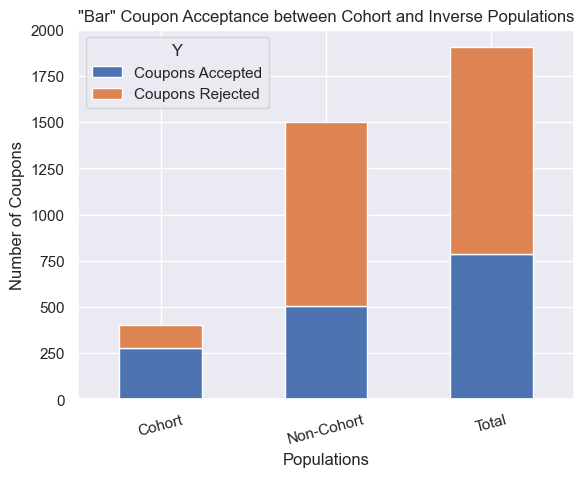

In [189]:
# Instead of creating a new column for this cohort, let's just query the parameters
cohort_bar_gte1 = ["1~3", "4~8", "gt8"] # values included as "one or more visits"
cohort_age_lt25 = ["below21", "21"] # values that should be *excluded* as "25yo or less"

# establish the acceptance counts for the entire population where coupon type = "Bar" (as total)
# 1. group by acceptance ("Y")
# 2. get the size of each grouping to determine acceptance rate
# 3. create a dataframe from the result set, renaming the counts field to something more readable
list_bar_total = coupon_bar.groupby("Y").size()
bar_total = pd.DataFrame(list_bar_total).rename(columns={0:"Total"})

# query the coupon_bar dataframe to:
# 1. subset based on the new cohort constraints above
# 2. group by acceptance ("Y")
# 3. get the size of each grouping to determine acceptance rate
# 4. create a dataframe from the result set, renaming the counts field to something more readable
list_bar_cohorts_gt1_25 = coupon_bar.query("Bar in @bar_cohorts_gte1 and age not in @age_cohorts_lt25")\
        .groupby("Y").size()
bar_cohorts_gt1_25 = pd.DataFrame(list_bar_cohorts_gt1_25).rename(columns={0:"Cohort"})

# Calculate acceptance counts for "others" cohort
# 1. Subtract the testing cohort list from the total list
# 2. create a dataframe from the result set, renaming the counts field to something more readable
list_bar_cohorts_others = list_bar_total - list_bar_cohorts_gt1_25
bar_cohorts_others = pd.DataFrame(list_bar_cohorts_others).rename(columns={0:"Non-Cohort"})

# Create a new dataframe merging the above three dataframes to illustrate acceptance values for 
# * cohort population (queried)
# * non-cohort population (calculated)
# Note: no need to merge "total" population
bar_cohorts_acceptance = pd.merge(bar_cohorts_gt1_25, bar_cohorts_others, on="Y", how="inner")
bar_cohorts_acceptance = bar_cohorts_acceptance.merge(bar_total, on="Y", how="inner")

# Transform the summary dataframe to setup for plotting
# 1. Transpose dataframe values (".T" or ".transpose()")
# 2. Rename columns for readability
bar_cohorts_acceptance = bar_cohorts_acceptance.T
bar_cohorts_acceptance.rename(columns={0:"Coupons Rejected", 1:"Coupons Accepted"}, inplace=True)

# Add columns indicating:
# 1. Total coupons offered
# 2. Acceptance rate
bar_cohorts_acceptance.insert(0, "Total Coupons Offered", 
                    bar_cohorts_acceptance["Coupons Accepted"] + bar_cohorts_acceptance["Coupons Rejected"])
bar_cohorts_acceptance["Acceptance Rate (%)"] = round(bar_cohorts_acceptance["Coupons Accepted"] / bar_cohorts_acceptance["Total Coupons Offered"] * 100, 1)

# Plot the accepted/rejected counts 
plt.figure(figsize=(15,6))
bar_cohorts_acceptance[["Coupons Accepted", "Coupons Rejected"]].plot.bar(stacked=True, title='"Bar" Coupon Acceptance between Cohort and Inverse Populations')
plt.xlabel("Populations")
plt.ylabel("Number of Coupons")
plt.xticks(rotation=15)

# Print the acceptance ratio between cohort and non-cohort populations
acceptance_cohort = bar_cohorts_acceptance.loc["Cohort"]["Acceptance Rate (%)"]
acceptance_non_cohort = bar_cohorts_acceptance.loc["Non-Cohort"]["Acceptance Rate (%)"]
acceptance_ratio = acceptance_cohort / acceptance_non_cohort

print("Ratio of coupon acceptance rates for the cohort versus non-cohort population is: " + str(round(acceptance_ratio, 0)))
bar_cohorts_acceptance


---
> ##### Insight:
Drivers over 25 years of age that visit a bar one or more times per month are **twice as likely to accept a "bar" coupon** than those that are younger than 25 and visit a bar less frequently.
---

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


---
> ##### Presumption:
> The question asks to compare bar coupon acceptance rates between the following cohort population, against it's inverse set:
> * 1+ bar visits/month
> * passenger was not a "Kid"
> * occupation was not "farming, fishing, forestry"
---

In [190]:
# Let's remind ourselves of the unique values for `passenger`
coupon_bar["passenger"].value_counts()

Alone        1139
Friend(s)     316
Partner       259
Kid(s)        192
Name: passenger, dtype: int64

In [191]:
# Let's remind ourselves of the unique values for `occupation`
coupon_bar["occupation"].value_counts()

Unemployed                                   292
Student                                      237
Computer & Mathematical                      222
Sales & Related                              175
Education&Training&Library                   125
Management                                   104
Office & Administrative Support              101
Arts Design Entertainment Sports & Media      88
Business & Financial                          82
Retired                                       71
Healthcare Support                            44
Food Preparation & Serving Related            43
Community & Social Services                   40
Healthcare Practitioners & Technical          36
Transportation & Material Moving              35
Legal                                         34
Protective Service                            27
Architecture & Engineering                    27
Personal Care & Service                       25
Construction & Extraction                     24
Life Physical Social

Ratio of coupon acceptance rates for the cohort versus non-cohort population is: 2.0


Y,Total Coupons Offered,Coupons Rejected,Coupons Accepted,Acceptance Rate (%)
Cohort,189,54,135,71.4
Non-Cohort,1717,1067,650,37.9
Total,1906,1121,785,41.2


<Figure size 1500x600 with 0 Axes>

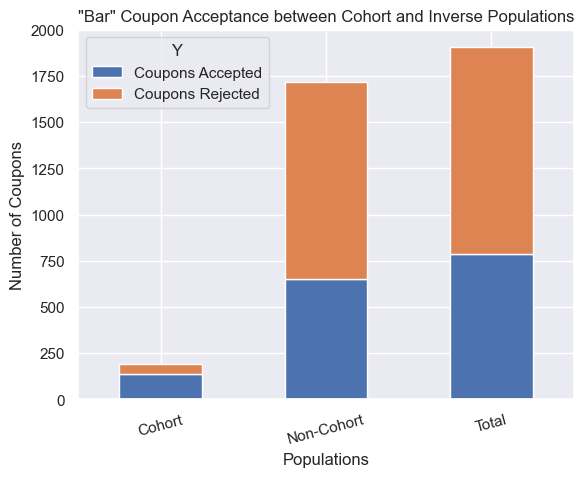

In [194]:
# As before, let's just query the cohort parameters
cohort_bar_gte1 = ["1~3", "4~8", "gt8"] # values included as "one or more visits"r less"
cohort_passenger_adult = ["Friend(s)", "Partner"] # exclude kid, and also "Alone" as a passenger is indicated
cohort_occupation_not_fff = ["Farming Fishing & Forestry"] # exclusion list for occupation

# establish the acceptance counts for the entire population where coupon type = "Bar" (as total)
# 1. group by acceptance ("Y")
# 2. get the size of each grouping to determine acceptance rate
# 3. create a dataframe from the result set, renaming the counts field to something more readable
list_bar_total = coupon_bar.groupby("Y").size()
bar_total = pd.DataFrame(list_bar_total).rename(columns={0:"Total"})

# query the coupon_bar dataframe to:
# 1. subset based on the new cohort constraints above
# 2. group by acceptance ("Y")
# 3. get the size of each grouping to determine acceptance rate
# 4. create a dataframe from the result set, renaming the counts field to something more readable
list_bar_cohorts = coupon_bar.query("Bar in @bar_cohorts_gte1 \
        and passenger in @cohort_passenger_adult \
        and occupation not in @cohort_occupation_not_fff")\
        .groupby("Y").size()

bar_cohorts = pd.DataFrame(list_bar_cohorts).rename(columns={0:"Cohort"})

# Calculate acceptance counts for "others" cohort
# 1. Subtract the testing cohort list from the total list
# 2. create a dataframe from the result set, renaming the counts field to something more readable
list_bar_cohorts_others = list_bar_total - list_bar_cohorts
bar_cohorts_others = pd.DataFrame(list_bar_cohorts_others).rename(columns={0:"Non-Cohort"})

# Create a new dataframe merging the above three dataframes to illustrate acceptance values for 
# * cohort population (queried)
# * non-cohort population (calculated)
# Note: no need to merge "total" population
bar_cohorts_acceptance = pd.merge(bar_cohorts, bar_cohorts_others, on="Y", how="inner")
bar_cohorts_acceptance = bar_cohorts_acceptance.merge(bar_total, on="Y", how="inner")

# Transform the summary dataframe to setup for plotting
# 1. Transpose dataframe values (".T" or ".transpose()")
# 2. Rename columns for readability
bar_cohorts_acceptance = bar_cohorts_acceptance.T
bar_cohorts_acceptance.rename(columns={0:"Coupons Rejected", 1:"Coupons Accepted"}, inplace=True)

# Add columns indicating:
# 1. Total coupons offered
# 2. Acceptance rate
bar_cohorts_acceptance.insert(0, "Total Coupons Offered", 
                    bar_cohorts_acceptance["Coupons Accepted"] + bar_cohorts_acceptance["Coupons Rejected"])
bar_cohorts_acceptance["Acceptance Rate (%)"] = round(bar_cohorts_acceptance["Coupons Accepted"] / bar_cohorts_acceptance["Total Coupons Offered"] * 100, 1)

# Plot the accepted/rejected counts 
plt.figure(figsize=(15,6))
bar_cohorts_acceptance[["Coupons Accepted", "Coupons Rejected"]].plot.bar(stacked=True, title='"Bar" Coupon Acceptance between Cohort and Inverse Populations')
plt.xlabel("Populations")
plt.ylabel("Number of Coupons")
plt.xticks(rotation=15)

# Print the acceptance ratio between cohort and non-cohort populations
acceptance_cohort = bar_cohorts_acceptance.loc["Cohort"]["Acceptance Rate (%)"]
acceptance_non_cohort = bar_cohorts_acceptance.loc["Non-Cohort"]["Acceptance Rate (%)"]
acceptance_ratio = acceptance_cohort / acceptance_non_cohort

print("Ratio of coupon acceptance rates for the cohort versus non-cohort population is: " + str(round(acceptance_ratio, 0)))
bar_cohorts_acceptance


---
> ##### Insight:
Drivers who didn't work in Farming/Fishing/Forestry, were travelling with an adult passenger, and visit a bar one or more times per month are **twice as likely to accept a "bar" coupon** than those that worked in Farming/Fishing/Forestry, were travelling either alone or with kids, and visited a bar less than once a month.
---

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



---
> ##### Presumption:
> The question asks to compare bar coupon acceptance rates between the following cohort population (an aggregation of three sub-populations, "or"), against it's inverse set:
> * sub-population 1:
>   * 1+ bar visits/month
>   * passenger was not a "Kid"
>   * marital status was not widowed
> * sub-population 2:
>   * 1+ bar visits/month
>   * less than 30 years of age
> * sub-population 3:
>   * 5+ visits/month to cheap restaurants (RestaurantLessThan20)
>   * Makes less than 50K income
---

In [196]:
# Let's remind ourselves of the unique values for `maritalStatus`
coupon_bar["maritalStatus"].value_counts()

Married partner      826
Single               638
Unmarried partner    352
Divorced              73
Widowed               17
Name: maritalStatus, dtype: int64

In [197]:
# Let's remind ourselves of the unique values for `RestaurantLessThan20`
coupon_bar["RestaurantLessThan20"].value_counts()

1~3      839
4~8      545
less1    308
gt8      186
never     28
Name: RestaurantLessThan20, dtype: int64

In [200]:
# Let's remind ourselves of the unique values for `income`
coupon_bar["income"].value_counts().sort_index()

$100000 or More     279
$12500 - $24999     271
$25000 - $37499     300
$37500 - $49999     247
$50000 - $62499     249
$62500 - $74999     129
$75000 - $87499     143
$87500 - $99999     129
Less than $12500    159
Name: income, dtype: int64

Ratio of coupon acceptance rates for the cohort versus non-cohort population is: 1.43


Y,Total Coupons Offered,Coupons Rejected,Coupons Accepted,Acceptance Rate (%)
Cohort,995,516,479,48.1
Non-Cohort,911,605,306,33.6
Total,1906,1121,785,41.2


<Figure size 1500x600 with 0 Axes>

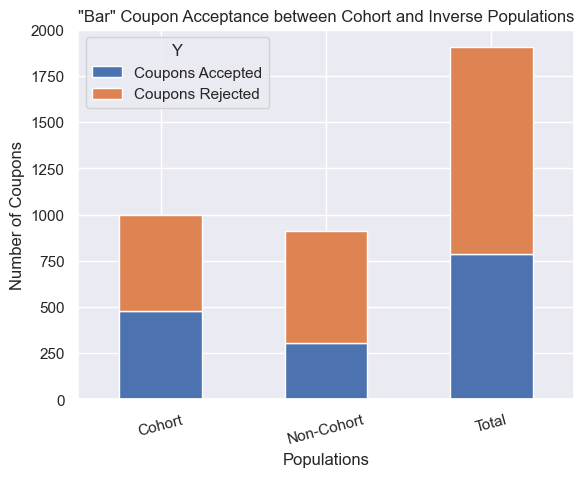

In [205]:
# As before, let's just query the cohort parameters
cohort_bar_gte1 = ["1~3", "4~8", "gt8"] # values included as "one or more visits"r less"
cohort_passenger_adult = ["Friend(s)", "Partner"] # exclude kid, and also "Alone" as a passenger is indicated
cohort_marital_widow = ["Widowed"] # exclusion list for maritalStatus
cohort_age_lt30 = ["below21", "21", "26"] # inclusion list for age
cohort_cheap_eats_gt4 = ["1~3", "4~8", "gt8"] # values included as more than 4 visits to RestaurantLessThan20
# values included income less than 50K
cohort_income_lt50k = ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"] 

# establish the acceptance counts for the entire population where coupon type = "Bar" (as total)
# 1. group by acceptance ("Y")
# 2. get the size of each grouping to determine acceptance rate
# 3. create a dataframe from the result set, renaming the counts field to something more readable
list_bar_total = coupon_bar.groupby("Y").size()
bar_total = pd.DataFrame(list_bar_total).rename(columns={0:"Total"})

# query the coupon_bar dataframe to:
# 1. subset based on the new cohort constraints above
# 2. group by acceptance ("Y")
# 3. get the size of each grouping to determine acceptance rate
# 4. create a dataframe from the result set, renaming the counts field to something more readable
list_bar_cohorts = coupon_bar.query(
    "(Bar in @bar_cohorts_gte1 \
        and passenger in @cohort_passenger_adult \
        and maritalStatus not in @cohort_marital_widow) \
    or \
     (Bar in @bar_cohorts_gte1 \
         and age in @cohort_age_lt30) \
    or \
     (RestaurantLessThan20 in @cohort_cheap_eats_gt4 \
         and income in @cohort_income_lt50k)")\
        .groupby("Y").size()

bar_cohorts = pd.DataFrame(list_bar_cohorts).rename(columns={0:"Cohort"})

# Calculate acceptance counts for "others" cohort
# 1. Subtract the testing cohort list from the total list
# 2. create a dataframe from the result set, renaming the counts field to something more readable
list_bar_cohorts_others = list_bar_total - list_bar_cohorts
bar_cohorts_others = pd.DataFrame(list_bar_cohorts_others).rename(columns={0:"Non-Cohort"})

# Create a new dataframe merging the above three dataframes to illustrate acceptance values for 
# * cohort population (queried)
# * non-cohort population (calculated)
# Note: no need to merge "total" population
bar_cohorts_acceptance = pd.merge(bar_cohorts, bar_cohorts_others, on="Y", how="inner")
bar_cohorts_acceptance = bar_cohorts_acceptance.merge(bar_total, on="Y", how="inner")

# Transform the summary dataframe to setup for plotting
# 1. Transpose dataframe values (".T" or ".transpose()")
# 2. Rename columns for readability
bar_cohorts_acceptance = bar_cohorts_acceptance.T
bar_cohorts_acceptance.rename(columns={0:"Coupons Rejected", 1:"Coupons Accepted"}, inplace=True)

# Add columns indicating:
# 1. Total coupons offered
# 2. Acceptance rate
bar_cohorts_acceptance.insert(0, "Total Coupons Offered", 
                    bar_cohorts_acceptance["Coupons Accepted"] + bar_cohorts_acceptance["Coupons Rejected"])
bar_cohorts_acceptance["Acceptance Rate (%)"] = round(bar_cohorts_acceptance["Coupons Accepted"] / bar_cohorts_acceptance["Total Coupons Offered"] * 100, 1)
bar_cohorts_acceptance.rename({"Y":"Populations"}, inplace=True)

# Plot the accepted/rejected counts 
plt.figure(figsize=(15,6))
bar_cohorts_acceptance[["Coupons Accepted", "Coupons Rejected"]].plot.bar(stacked=True, title='"Bar" Coupon Acceptance between Cohort and Inverse Populations')
plt.xlabel("Populations")
plt.ylabel("Number of Coupons")
plt.xticks(rotation=15)

# Print the acceptance ratio between cohort and non-cohort populations
acceptance_cohort = bar_cohorts_acceptance.loc["Cohort"]["Acceptance Rate (%)"]
acceptance_non_cohort = bar_cohorts_acceptance.loc["Non-Cohort"]["Acceptance Rate (%)"]
acceptance_ratio = acceptance_cohort / acceptance_non_cohort

print("Ratio of coupon acceptance rates for the cohort versus non-cohort population is: " + str(round(acceptance_ratio, 2)))
bar_cohorts_acceptance


---
> ##### Insight:
Drivers who fit any of the three cohorts were **1.4 times as likely to accept a "bar" coupon** than those that were in neigther.
---

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

---
> ##### Initial Questions to explore:
> * Would you accept that coupon and take a short detour to the restaraunt?
> * Would you accept the coupon but use it on a sunbsequent trip? 
> * Would you ignore the coupon entirely? 
> * What if the coupon was for a bar instead of a restaraunt?
> * What about a coffee house? 
> * Would you accept a bar coupon with a minor passenger in the car? 
> * What about if it was just you and your partner in the car? 
> * Would weather impact the rate of acceptance? 
> * What about the time of day?
---

---
> ##### Next Steps:
> * **Interpolating missing data:**
>   * Seek any additional data/correlations to interpolate values for `car`
>   * Can the missing data for visits (`CoffeeHouse`, `Restaurant20To50`, `CarryAway`, `RestaurantLessThan20`, `Bar`) be interpolated some correlative means, as statistical interpolation would not be appropriate for the categorical values (converting category values to numerical representation would be incorrect, based on the implied ranges)
> * **Legislative/Regulation adherence:**
>   * Review any existing laws within each geographical region this coupon product would target a driver, e.g. [US' "Distracted Driving | Cellphone Use" laws](https://www.ncsl.org/transportation/distracted-driving-cellphone-use#:~:text=Hand%2Dheld%20cellphone%20use%20ban,hand%2Dheld%20cellphones%20while%20driving. "Source: ncsl.org"), indicating 29 states/regions prohibit the use of cell phones while driving
>  * Consider adjusting *geo-fencing* whitelist/blacklist to comply with any discovered restrictions, as we can infer it unlikely for a solo driver to *legally* act on a coupon notification while driving. Is there a means to know if the recipient is a non-driver, and therefore may more readily see the coupon offer in a timely manner?
> * 
---
